In [17]:
from scipy.integrate import simps as simpson

In [18]:
from jw_ice.jw_ice.calc_ext import *
import json
import os

In [19]:
model = OpacityModel() 

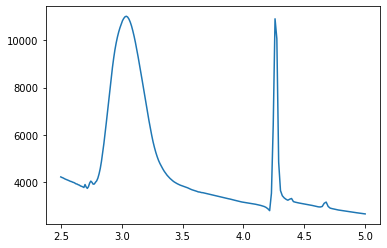

In [20]:
# plot total extinction vs. wavelength
model.plot_cext()

In [21]:
# ice thickness code 

import json

class OpacityModel_1():
    def __init__(self,ice_thick=None):
        
        
        self.read_setup()
        
        #override default config with passed parameter
        if ice_thick:
            self.config['dust']['ice_thick'] = ice_thick
   #         self.ice_thick = self.config['dust']['ice_thick'] #configure self.ice_thick
        self.print_ice()

    def read_setup(self):
        with open('jw_ice/jw_ice/config.json', 'r') as file:
            self.config = json.load(file)

        self.ice_thick = self.config['dust']['ice_thick']

    def print_ice(self):
        print(self.config['dust']['ice_thick'])
        print(self.ice_thick)

model = OpacityModel_1(ice_thick=0.1)

0.1
0.5


# run_opac_grid

In [22]:
from jw_ice.examples.run_opac_grid import *

all_pars is a list of ranges of all four variables. master_iter_withid iterates through these ranges from the right-most variable to the left, to create one master list. (10)(10)(1)(30) = 3000 combinations

all_pars = [amins,amaxs,alphas,ice_thicks]

In [23]:
all_pars

[array([0.01]),
 array([ 0.011     ,  0.01391277,  0.01759684,  0.02225643,  0.02814987,
         0.03560389,  0.0450317 ,  0.05695597,  0.07203776,  0.09111317,
         0.1152397 ,  0.14575486,  0.18435036,  0.23316584,  0.29490754,
         0.37299827,  0.47176721,  0.59668991,  0.75469181,  0.95453219,
         1.20728978,  1.52697689,  1.9313163 ,  2.44272371,  3.08955044,
         3.90765517,  4.94239184,  6.25112403,  7.90640502, 10.        ]),
 array([-2.5       , -2.61111111, -2.72222222, -2.83333333, -2.94444444,
        -3.05555556, -3.16666667, -3.27777778, -3.38888889, -3.5       ]),
 array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])]

In [24]:
master_iter_withid[:11]

[{'pars': (0.01, 0.010999999999999998, -2.5, 0.1), 'id': 0},
 {'pars': (0.01, 0.010999999999999998, -2.5, 0.2), 'id': 1},
 {'pars': (0.01, 0.010999999999999998, -2.5, 0.30000000000000004), 'id': 2},
 {'pars': (0.01, 0.010999999999999998, -2.5, 0.4), 'id': 3},
 {'pars': (0.01, 0.010999999999999998, -2.5, 0.5), 'id': 4},
 {'pars': (0.01, 0.010999999999999998, -2.5, 0.6), 'id': 5},
 {'pars': (0.01, 0.010999999999999998, -2.5, 0.7000000000000001), 'id': 6},
 {'pars': (0.01, 0.010999999999999998, -2.5, 0.8), 'id': 7},
 {'pars': (0.01, 0.010999999999999998, -2.5, 0.9), 'id': 8},
 {'pars': (0.01, 0.010999999999999998, -2.5, 1.0), 'id': 9},
 {'pars': (0.01, 0.010999999999999998, -2.611111111111111, 0.1), 'id': 10}]

In [25]:
# check that there are 3000 combinations
master_iter_withid[-1]

{'pars': (0.01, 10.0, -3.5, 1.0), 'id': 2999}

In [26]:
# find id of given opacity file       
amax_ind = 0       #range(0,30)
alpha_ind = 0      #range(0,10) 
icethick_ind = 0   #range(0,10) 
id_ = (amax_ind*100)+(alpha_ind*10)+icethick_ind

for each element of the list, run Opacity Model on the four input parameters

{'pars': (0.01, 0.010999999999999998, -2.5, 0.1), 'id': 0}


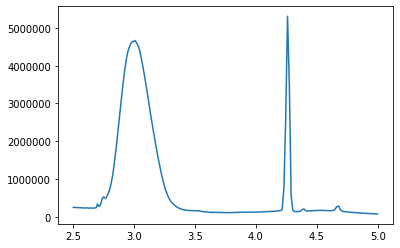

In [27]:
pars_and_id = master_iter_withid[0]
print(pars_and_id) #print input parameters
pars = pars_and_id['pars']
model = OpacityModel(amin=pars[0],amax=pars[1],alpha=pars[2],ice_thick=pars[3],outname="none")
model.plot_cext() #plot extinction vs. wavelength

In [28]:
def run_model(pars_and_id):
    id = pars_and_id['id']
    pars = pars_and_id['pars']
    outname = 'jw_ice/opacities/opacity_'+str(0)+'.fits'
    model = OpacityModel(amin=pars[0],amax=pars[1],alpha=pars[2],ice_thick=pars[3],outname=outname)
    print(outname)
    
run_model(master_iter_withid[0])

jw_ice/opacities/opacity_0.fits


estimate integral: 5.374967021238065e-12
estimate integral: 5.0000000000000005e-12
traps approx: 5.090267651948386e-11
simpson approx: 5.0902341663478785e-11
total solid mass: [2.0386179616194473e-16, 2.0386179616194473e-16]
opacity: [249690.44039542717, 249690.44039542717]


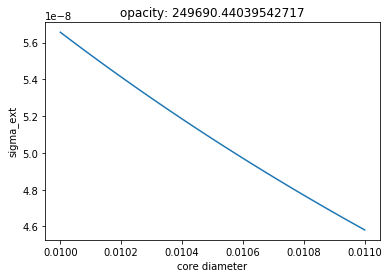

In [29]:
for iw in range(1): #model.nwave): #for each wavelength (200 values total)
    exts = model.int_exts[:,iw] #extinction for 30 grain sizes at each wavelength 
    # length of exts array is 30; corresponds to each grain size in acores
    acores = model.acores
    plt.plot(acores,exts)
    plt.xlabel("core diameter")
    plt.ylabel("sigma_ext")
    
    #verify calculation for total effective extinction cross-section [cm^2]
    sig_exts = model.qexts[:,iw]*np.pi/4*model.fdist*((model.acores+model.ice_thick)*1e-4)**2
 #   plt.plot(acores,sig_exts) #correct!

    ###integrate over size distribution
    #estimate
    print("estimate integral:",((exts[0]-exts[-1])*(acores[-1]-acores[0]))*0.5)
    print("estimate integral:",1e-8*1e-3/2)
    
    #use np.trapz approximation
    print("traps approx:",np.trapz(exts,x=acores))
    
    #use simpson approximation
    ext_int = simpson(exts*model.acores,x=model.lnacores)
    print("simpson approx:",ext_int) #simps integration
    
    #calculate total solid mass
    mass_tot = model.dens_core*model.fdist*4*np.pi/3*(acores/2*1e-4)**3
    mass_int = simpson(mass_tot*acores,x=model.lnacores)
    print("total solid mass:",[mass_int,model.ma_tot])
    
    #normalize total extinction cross sectional area/total solid mass [cm^2/g]
    kap = ext_int/mass_int
    print("opacity:",[model.sigma_exts_tot[iw],kap])
    plt.title("opacity: "+str(kap))
    

integral: 1429575.9054276152
estimate: 1574999.9999999993
integrate with wavenumber: 1592227034.947634


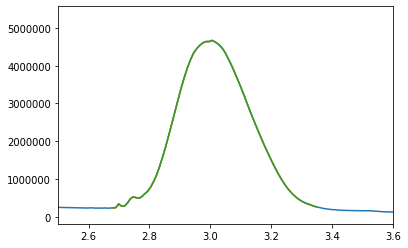

In [30]:
kaps=[]
for iw in range(model.nwave):
    exts = model.int_exts[:,iw]
    acores = model.acores
    ext_int = simpson(exts*model.acores,x=model.lnacores)
    kappa = ext_int/model.ma_tot
    kaps.append(kappa)
plt.plot(model.waves,kaps)
plt.xlim(2.5,3.6)

waves_h2o = model.waves[20:85]
kaps_h2o = kaps[20:85]
plt.plot(waves_h2o,kaps_h2o)

plt.plot(model.waves[20:85],model.sigma_exts_tot[20:85])

print("integral:",simpson(kaps_h2o,x=waves_h2o))
print("estimate:",4500000*(3.4-2.7)/2)

nus_h2o = np.flip(1/(waves_h2o*1e-4))
print("integrate with wavenumber:",simpson(kaps_h2o,x=nus_h2o))



write to file with write_opac() from calc_ext.py

columns:
- wavelength
- cext, total extinction
- csca, total scattering
- g, assymetry parameter


read files using fits.getdata()

307.3387696627636

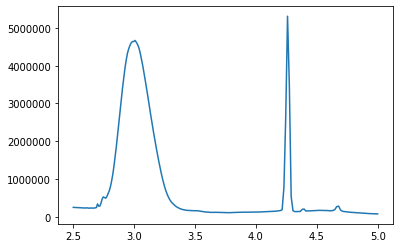

In [31]:
# check that reading data creates the same graph
id_=0
data_raw = fits.getdata('jw_ice/opacities/opacity_'+str(id_)+'.fits')
hdulist = fits.open('jw_ice/opacities/opacity_'+str(id_)+'.fits')
plt.plot(data_raw['wavelength'], data_raw['cext'])
hdulist[1].header["ratio"]


[307.3387696627636,
 223.2250408525618,
 162.2263807349004,
 117.9291234072427,
 85.73013980284314,
 62.31322582227893,
 45.28086527041435,
 32.89444769967901,
 23.89017639260788,
 17.34789124748566,
 12.59702989519509,
 9.148810189638388,
 6.647063703321754,
 4.832441062847492,
 3.516276458415629,
 2.561473749096062,
 1.868520869276099,
 1.365260864576279,
 0.9994185245867334,
 0.7331484250557686,
 0.5390644266930962,
 0.3973531875961747,
 0.2936793144136646,
 0.2176674077437683,
 0.1618036184451145,
 0.1206416561452839,
 0.09022934823869588,
 0.06769471896424199,
 0.05094729667838782,
 0.03846257110813611]

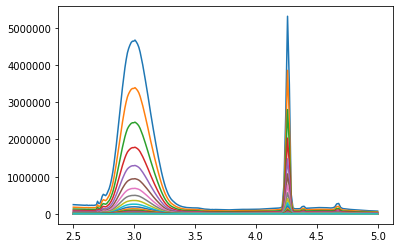

In [32]:
# create sublist
# vary amax while keeping the other parameters fixed
def vary_amax(alpha_ind=0,ice_thick_ind=0): #input fixed alpha/ice thickness
    pars=[]
    ids = []
    for x in np.arange(0,3000,100):
        id_ = x+(alpha_ind*10)+ice_thick_ind
        pars.append(master_iter_withid[id_])
        ids.append(id_)
    return pars,ids

pars,ids = vary_amax()

ratios=[]
for id_ in ids:
    data_raw = fits.getdata('jw_ice/opacities/opacity_'+str(id_)+'.fits')
    hdulist = fits.open('jw_ice/opacities/opacity_'+str(id_)+'.fits')
    plt.plot(data_raw['wavelength'], data_raw['cext'])
    ratios.append(hdulist[1].header["ratio"])
ratios


(amin, amax, alpha, ice thickness)
(0.01, 0.010999999999999998, -2.5, 0.1)
(0.01, 0.09111317112210193, -2.5, 0.1)
(0.01, 0.9545321949630716, -2.5, 0.1)
(0.01, 10.0, -2.5, 0.1)


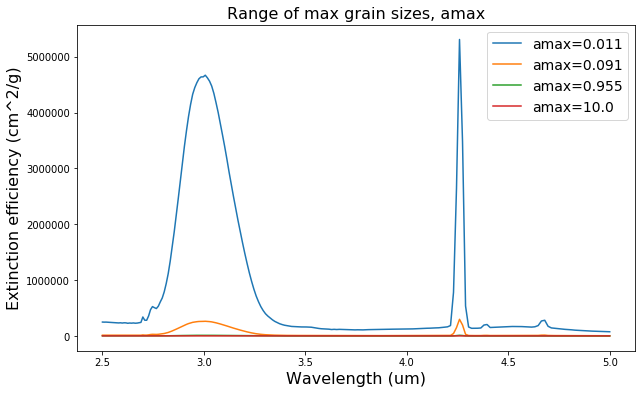

In [33]:
# graph a range of max grain sizes

# choose alpha and ice thickness to fix
# alpha[0] = -2.5
# ice thickness[0] = 0.1
pars,ids = vary_amax(0,0)

fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)

print("(amin, amax, alpha, ice thickness)")
for i in np.linspace(0,len(ids)-1,4,dtype=int):
    print(pars[i]["pars"])
    data_raw = fits.getdata('jw_ice/opacities/opacity_'+str(ids[i])+'.fits')
    ax1.plot(data_raw['wavelength'], data_raw['cext'],label="amax="+str(round(pars[i]["pars"][1],3)))

ax1.set_title("Range of max grain sizes, amax",fontsize=16)
ax1.set_xlabel("Wavelength (um)",fontsize=16)
ax1.set_ylabel("Extinction efficiency (cm^2/g)",fontsize=16)
ax1.legend(fontsize=14)

In [34]:
# vary alpha while keeping the other parameters fixed
def vary_alpha(amax_ind=0,ice_thick_ind=0): #input fixed amax/ice thickness
    pars=[]
    ids = []
    for x in np.arange(0,10,1):
        id_ = (amax_ind*100)+10*x+ice_thick_ind
        pars.append(master_iter_withid[id_])
        ids.append(id_)
    return pars,ids

pars,ids = vary_alpha()

(amin, amax, alpha, ice thickness)
(0.01, 0.010999999999999998, -2.5, 0.1)
(0.01, 0.010999999999999998, -2.8333333333333335, 0.1)
(0.01, 0.010999999999999998, -3.1666666666666665, 0.1)
(0.01, 0.010999999999999998, -3.5, 0.1)


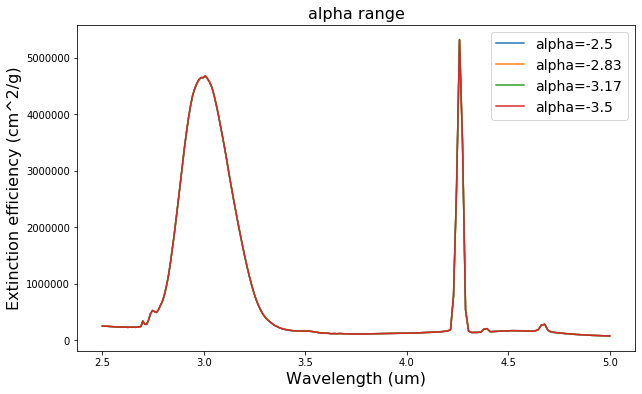

In [35]:
# graph alpha range

# choose amax and ice thickness to fix
# amax[0] = 0.011
# ice thickness[0] = 0.1
pars,ids = vary_alpha(0,0)

fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)

print("(amin, amax, alpha, ice thickness)")
for i in np.linspace(0,len(ids)-1,4,dtype=int):
    print(pars[i]["pars"])
    data_raw = fits.getdata('jw_ice/opacities/opacity_'+str(ids[i])+'.fits')
    ax1.plot(data_raw['wavelength'], data_raw['cext'],label="alpha="+str(round(pars[i]["pars"][2],2)))

# slight variation
#ax1.set_xlim(2.95,3.1)
#ax1.set_ylim(207000,207500)

ax1.set_title("alpha range",fontsize=16)
ax1.set_xlabel("Wavelength (um)",fontsize=16)
ax1.set_ylabel("Extinction efficiency (cm^2/g)",fontsize=16)
ax1.legend(fontsize=14)

In [36]:
# vary ice thickness while keeping the other parameters fixed
def vary_icethick(amax_ind=0,alpha_ind=0): #input fixed amax/alpha
    pars=[]
    ids = []
    for x in np.arange(0,10,1):
        id_ = (amax_ind*100)+(alpha_ind*10)+x
        pars.append(master_iter_withid[id_])
        ids.append(id_)
    return pars,ids

pars,ids = vary_icethick()

(amin, amax, alpha, ice thickness)
(0.01, 10.0, -3.5, 0.1)
(0.01, 10.0, -3.5, 0.4)
(0.01, 10.0, -3.5, 0.7000000000000001)
(0.01, 10.0, -3.5, 1.0)


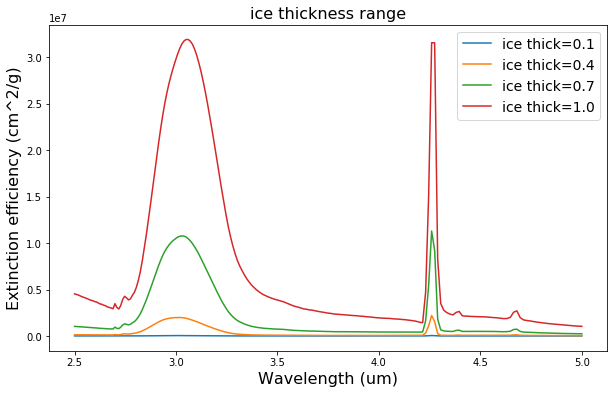

In [37]:
# graph ice thickness range

# choose amax and alpha to fix
# amax[0] = 0.011
# alpha[0] = -2.5
pars,ids = vary_icethick(29,9)

fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)

print("(amin, amax, alpha, ice thickness)")
for i in np.linspace(0,len(ids)-1,4,dtype=int):
    print(pars[i]["pars"])
    data_raw = fits.getdata('jw_ice/opacities/opacity_'+str(ids[i])+'.fits')
    ax1.plot(data_raw['wavelength'], data_raw['cext'],label="ice thick="+str(round(pars[i]["pars"][3],2)))

# all four plots are equal
#ax1.set_xlim(3,3.05)
#ax1.set_ylim(207100,207200)

ax1.set_title("ice thickness range",fontsize=16)
ax1.set_xlabel("Wavelength (um)",fontsize=16)
ax1.set_ylabel("Extinction efficiency (cm^2/g)",fontsize=16)
ax1.legend(fontsize=14)

In [38]:
all_pars

[array([0.01]),
 array([ 0.011     ,  0.01391277,  0.01759684,  0.02225643,  0.02814987,
         0.03560389,  0.0450317 ,  0.05695597,  0.07203776,  0.09111317,
         0.1152397 ,  0.14575486,  0.18435036,  0.23316584,  0.29490754,
         0.37299827,  0.47176721,  0.59668991,  0.75469181,  0.95453219,
         1.20728978,  1.52697689,  1.9313163 ,  2.44272371,  3.08955044,
         3.90765517,  4.94239184,  6.25112403,  7.90640502, 10.        ]),
 array([-2.5       , -2.61111111, -2.72222222, -2.83333333, -2.94444444,
        -3.05555556, -3.16666667, -3.27777778, -3.38888889, -3.5       ]),
 array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])]

In [39]:
def plot_model(amax_ind,alpha_ind,ice_thick_ind,band=None):
    # create 4 plots?
    if amax_ind == "vary":
        alpha = str(round(all_pars[2][alpha_ind],2))
        ice_thick = str(round(all_pars[3][ice_thick_ind],2))
        pars,ids = vary_amax(alpha_ind,ice_thick_ind)
        title = ("amax=vary","alpha="+alpha,"ice thick="+ice_thick)
        ind = [1,30]
    elif alpha_ind == "vary":
        amax = str(round(all_pars[1][amax_ind],2))
        ice_thick = str(round(all_pars[3][ice_thick_ind],2))
        pars,ids = vary_alpha(amax_ind,ice_thick_ind)
        title = ("amax="+amax,"alpha=vary","ice thick="+ice_thick)
        ind = [2,10]
    elif ice_thick_ind == "vary":
        amax = str(round(all_pars[1][amax_ind],2))
        alpha = str(round(all_pars[2][alpha_ind],2))
        pars,ids = vary_icethick(amax_ind,alpha_ind)
        title = ("amax="+amax,"alpha="+alpha,"ice thick=vary")
        ind = [3,10]
    else:
        print("inputs must include two constants and 'vary'")
    
    if band:
        labels = []
        cexts = {}
        params = {"labels":("amin", "amax", "alpha", "ice thickness")}
        ratios = []
        xs=all_pars[ind[0]]
        for i in np.arange(0,ind[1],1):
            # import data for all 30/10/10 data files
            data_raw = fits.getdata('jw_ice/opacities/opacity_'+str(ids[i])+'.fits')
            hdulist = fits.open('jw_ice/opacities/opacity_'+str(ids[i])+'.fits')
            ratio = hdulist[1].header["ratio"]
            ratios.append(ratio)
            label = params["labels"][ind[0]]+"="+str(round(pars[i]["pars"][ind[0]],3))
            labels.append(str(label))
            waves = data_raw['wavelength']
            cexts[ids[i]] = data_raw['cext']
            params[ids[i]] = (master_iter_withid[id_])
        A_Alab,Alab = calc_bands(waves,cexts,ids,ind,ratios)
        
   #     plot_band(xs,A_Alab,Alab,ind)
        return title,ids,labels,xs,A_Alab,params,Alab,ind,ratios
        
    else: # plot subset of 4
        ids_subs = []
        labels = []
        cexts = {}
        params = {"labels":("amin", "amax", "alpha", "ice thickness")}
        for i in np.linspace(0,len(ids)-1,4,dtype=int):
            ids_subs.append(ids[i])
            data_raw = fits.getdata('jw_ice/opacities/opacity_'+str(ids[i])+'.fits')
            label = params["labels"][ind[0]]+"="+str(round(pars[i]["pars"][ind[0]],3))
            labels.append(str(label))
            waves = data_raw['wavelength']
            cexts[ids[i]] = data_raw['cext']
            params[ids[i]] = pars[i]["pars"]
      #  create_plot(title,ids_subs,labels,waves,cexts,params)
        return title,ids_subs,labels,waves,cexts,params

def calc_bands(waves,cexts,ids,ind,ratios):
    #limit range to 3 micron h2o band
    w_h2o = waves[20:85]
    
    # convert wavelength to wavenumber
    nus = 1/(w_h2o*1e-4) #wavenumber (cm^-1)
    nus = np.flip(nus) #list must be in increasing order for integration

    # calculate band strength
    As = []
    mu = 3e-23 #[g/molecule H2O]
    for i in np.arange(0,ind[1],1):
        band = simpson(cexts[ids[i]][20:85],x=nus) #[cm g^-1]
        
        # convert from cm/g rock to cm/g ice
        A = band/ratios[i] #each ratio is total mass ice/total mass solid core
        
        # convert from cm/gice combo to just cm/g H2O ice
        A /= 100/123 #g H2O/g total ice (APPROX)
        
        A *= mu #[cm/molec]
        As.append(A) 
    

    Alab = 2e-16 #[cm/molec H2O]
    A_Alab = [A / Alab for A in As]
    
  #  print("band strength As[0]",As[0])
  #  print("earlier band/band strength:",1592227034,1592227034/ratios[0]*100/123*mu)
    
    band0 = simpson(cexts[ids[0]][20:85],x=nus)
    A0 = band0/ratios[0]*100/123*mu
  #  print("integral and band strength",band0,A0)

    return A_Alab,Alab

def create_plot(title,ids_subs,labels,waves,cexts,params):
    fig=plt.figure(1,figsize=(10,6))
    ax1=fig.add_subplot(111)
    for i in range(len(ids_subs)):
        ax1.plot(waves, cexts[ids_subs[i]],label=labels[i])   
    ax1.set_title(title,fontsize=16)
    ax1.set_xlabel("Wavelength (um)",fontsize=16)
    ax1.set_ylabel("Extinction efficiency (cm^2/g)",fontsize=16)
    ax1.legend(fontsize=13)

def plot_band(amax_ind,alpha_ind,ice_thick_ind):
    title,ids,labels,xs,A_Alab,params,Alab,ind,ratios = plot_model(
        amax_ind,alpha_ind,ice_thick_ind,band='yes')
    
    fig=plt.figure(1,figsize=(10,6))
    ax1=fig.add_subplot(111)
 #   ax1.plot(nus,cexts[ids[15]])
 #   ax1.plot(xs,As)
    ax1.plot(xs,A_Alab)
    ax1.plot(xs,A_Alab,'o')
    ax1.axhline(y=1,linestyle='--')

    if ind[0] == 1:
        ax1.set_title("relative band strength vs. grain size",fontsize=16)
        ax1.set_xlabel("grain diameter (um)",fontsize=16)
        ax1.set_xscale("log")
    elif ind[0] == 2:
        ax1.set_title("relative band strength vs. power law index",fontsize=16)
        ax1.set_xlabel("alpha",fontsize=16)
        ax1.text(xs[4],A_Alab[4],str(title),fontsize=12)
     #   plt.savefig("Avalpha.png")
    elif ind[0] == 3:
        ax1.set_title("relative band strength vs. ice thickness",fontsize=16)
        ax1.set_xlabel("ice mantle thickness (microns)",fontsize=16)
    ax1.set_ylabel("A /A Lab",fontsize=16)
    

def vary_amax(alpha_ind=0,ice_thick_ind=0): #input fixed alpha/ice thickness
    pars=[]
    ids = []
    for x in np.arange(0,30,1):
        id_ = (x*100)+(alpha_ind*10)+ice_thick_ind
        pars.append(master_iter_withid[id_])
        ids.append(id_)
    return pars,ids

def vary_alpha(amax_ind=0,ice_thick_ind=0): #input fixed amax/ice thickness
    pars=[]
    ids = []
    for x in np.arange(0,10,1):
        id_ = (amax_ind*100)+(x*10)+ice_thick_ind
        pars.append(master_iter_withid[id_])
        ids.append(id_)
    return pars,ids

def vary_icethick(amax_ind=0,alpha_ind=0): #input fixed amax/alpha
    pars=[]
    ids = []
    for x in np.arange(0,10,1):
        id_ = (amax_ind*100)+(alpha_ind*10)+x
        pars.append(master_iter_withid[id_])
        ids.append(id_)
    return pars,ids


# create subplot grid
# inputs = [("vary",0,0),("vary",3,0),("vary",6,0),("vary",9,0)]



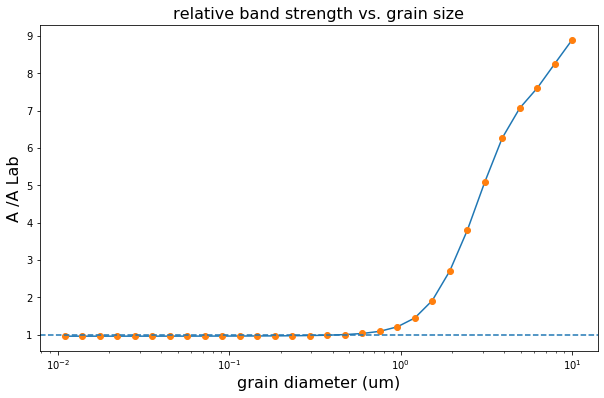

In [40]:
title,ids_subs,labels,xs,A_Alab,params,Alab,ind,ratios = plot_model("vary",0,0,band="yes")
plot_band("vary",0,0)

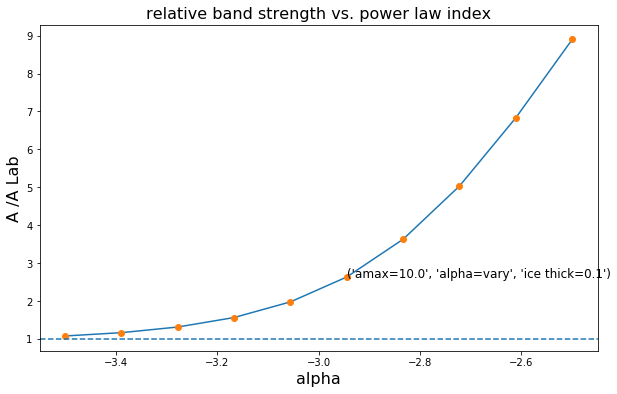

In [41]:
plot_band(29,"vary",0)

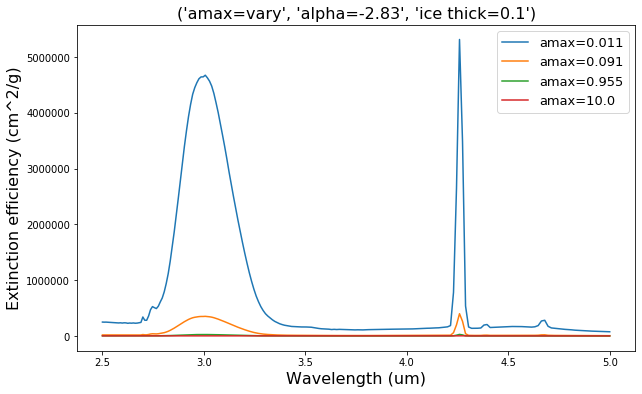

In [42]:
title,ids_subs,labels,waves,cexts,params = plot_model("vary",3,0)
create_plot(title,ids_subs,labels,waves,cexts,params)

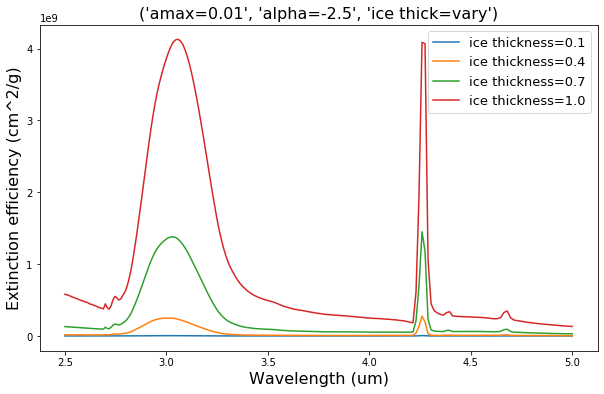

In [43]:
title,ids_subs,labels,waves,cexts,params = plot_model(0,0,"vary")
create_plot(title,ids_subs,labels,waves,cexts,params)

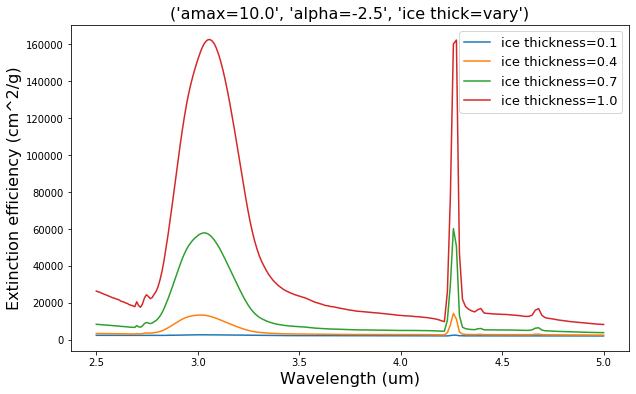

In [44]:
title,ids_subs,labels,waves,cexts,params = plot_model(29,0,"vary")
create_plot(title,ids_subs,labels,waves,cexts,params)

In [45]:
# create subplot grid
# inputs = [("vary",0,0),("vary",3,0),("vary",6,0),("vary",9,0)]

def create_grid(inp):
    title0,ids0,labels0,x0,y0,params0 = plot_model(inp[0][0],inp[0][1],inp[0][2])
    title1,ids1,labels1,x1,y1,params1 = plot_model(inp[1][0],inp[1][1],inp[1][2])
    title2,ids2,labels2,x2,y2,params2 = plot_model(inp[2][0],inp[2][1],inp[2][2])
    title3,ids3,labels3,x3,y3,params3 = plot_model(inp[3][0],inp[3][1],inp[3][2])
    titles = (title0,title1,title2,title3)
    ids = (ids0,ids1,ids2,ids3)
    labels = (labels0,labels1,labels2,labels3)
    xs = (x0,x1,x2,x3)
    ys = (y0,y1,y2,y3)
    params = (params0,params1,params2,params3)

    fig=plt.figure(1,figsize=(15,10))
    ax0 = fig.add_subplot(2,2,1)
    ax1 = fig.add_subplot(2,2,2)
    ax2 = fig.add_subplot(2,2,3)
    ax3 = fig.add_subplot(2,2,4)
    axs = (ax0,ax1,ax2,ax3)
    for i in range(4):
        idlist = ids[i]
        for i_vary in range(len(idlist)):
            axs[i].plot(xs[i], ys[i][idlist[i_vary]],label=labels[i][i_vary])
        axs[i].set(title=titles[i],xlabel="Wavelength (um)", 
                   ylabel="Opacity (cm^2/g)")
        axs[i].legend()
     #   axs[i].set_ylim(1000,18000)
    
 #   plt.savefig("vary_core.png")


In [46]:
all_pars

[array([0.01]),
 array([ 0.011     ,  0.01391277,  0.01759684,  0.02225643,  0.02814987,
         0.03560389,  0.0450317 ,  0.05695597,  0.07203776,  0.09111317,
         0.1152397 ,  0.14575486,  0.18435036,  0.23316584,  0.29490754,
         0.37299827,  0.47176721,  0.59668991,  0.75469181,  0.95453219,
         1.20728978,  1.52697689,  1.9313163 ,  2.44272371,  3.08955044,
         3.90765517,  4.94239184,  6.25112403,  7.90640502, 10.        ]),
 array([-2.5       , -2.61111111, -2.72222222, -2.83333333, -2.94444444,
        -3.05555556, -3.16666667, -3.27777778, -3.38888889, -3.5       ]),
 array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])]

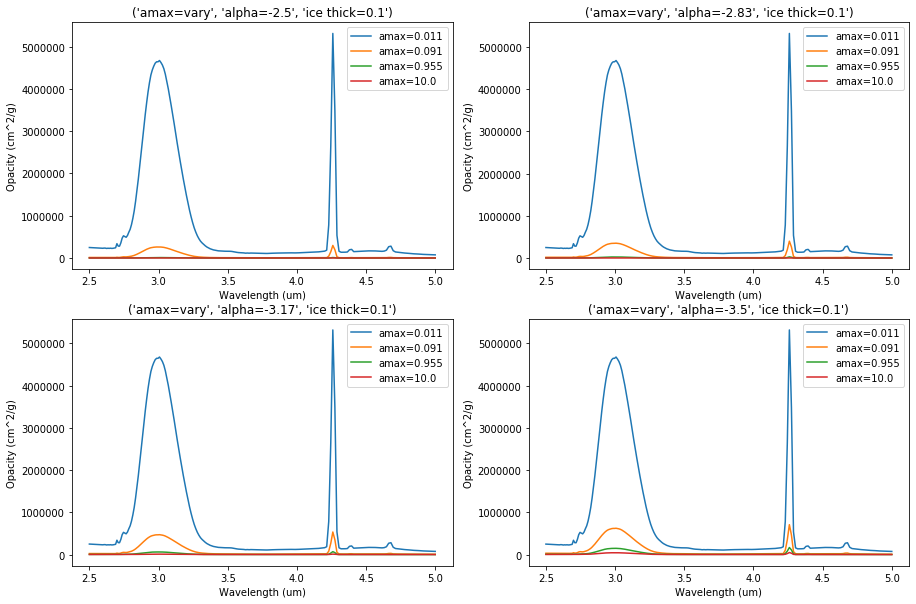

In [47]:
# vary amax, change alpha. ice thick = 0.1
create_grid([("vary",0,0),("vary",3,0),("vary",6,0),("vary",9,0)])

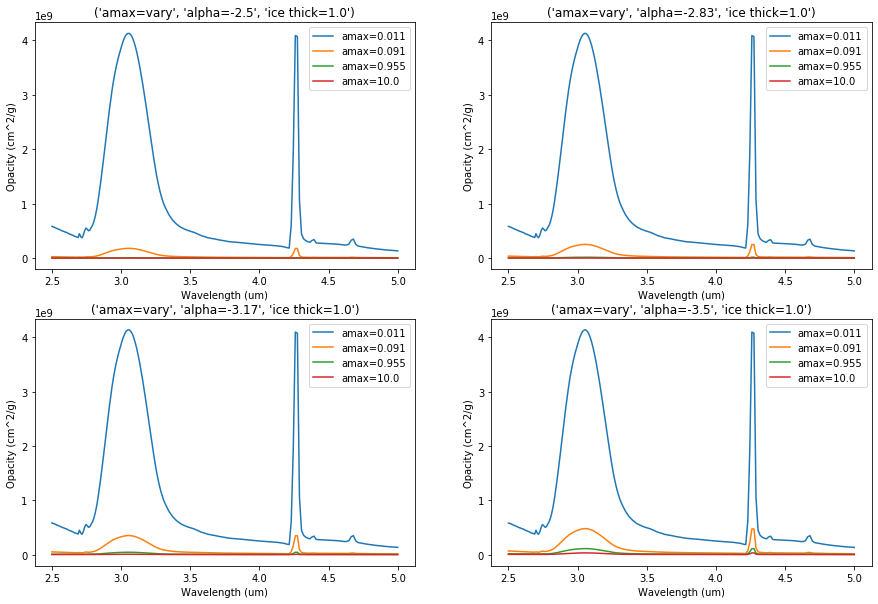

In [48]:
# vary amax, change alpha. ice thick = 1.0
create_grid([("vary",0,9),("vary",3,9),("vary",6,9),("vary",9,9)])

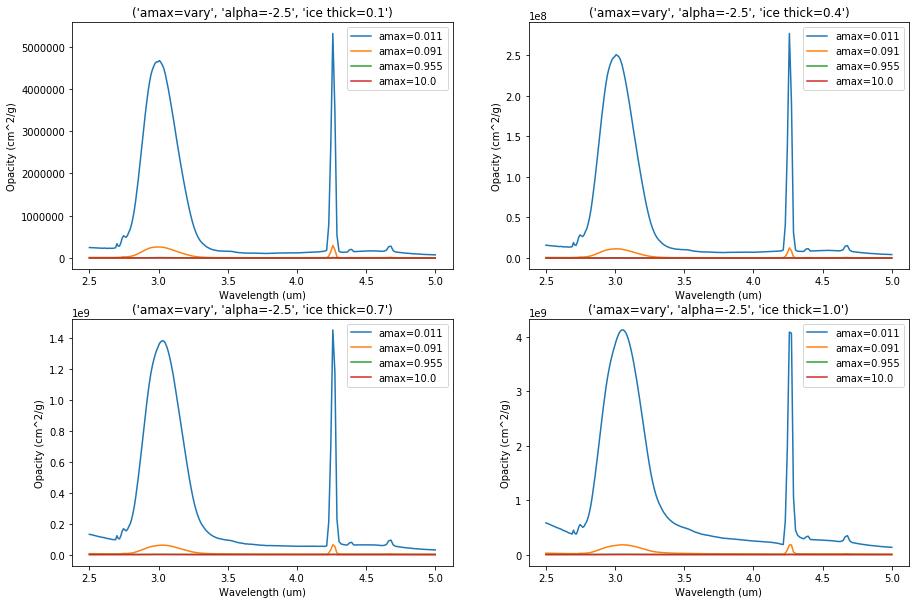

In [49]:
# vary amax, change thickness. alpha = -2.5
create_grid([("vary",0,0),("vary",0,3),("vary",0,6),("vary",0,9)])

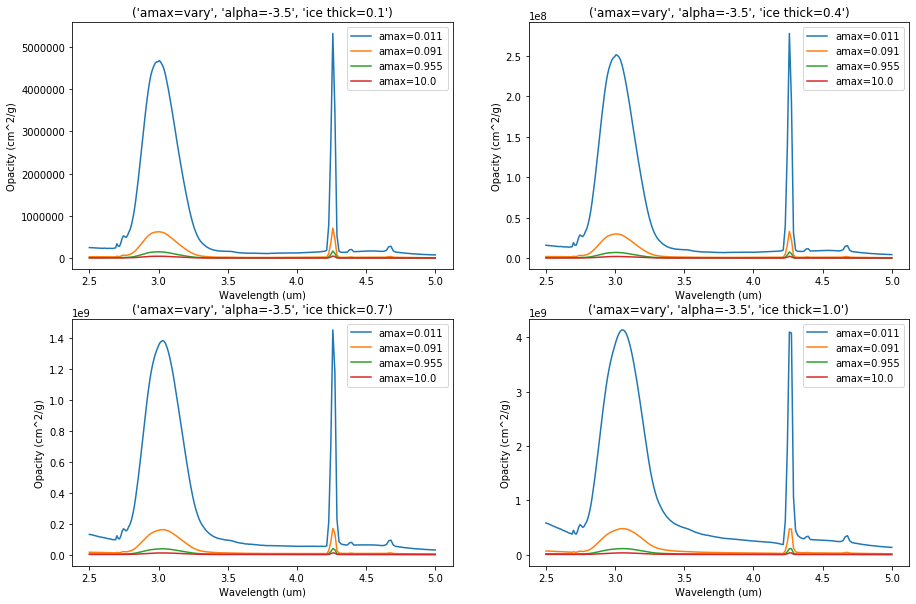

In [50]:
# vary amax, change thickness. alpha = -3.5
create_grid([("vary",9,0),("vary",9,3),("vary",9,6),("vary",9,9)])

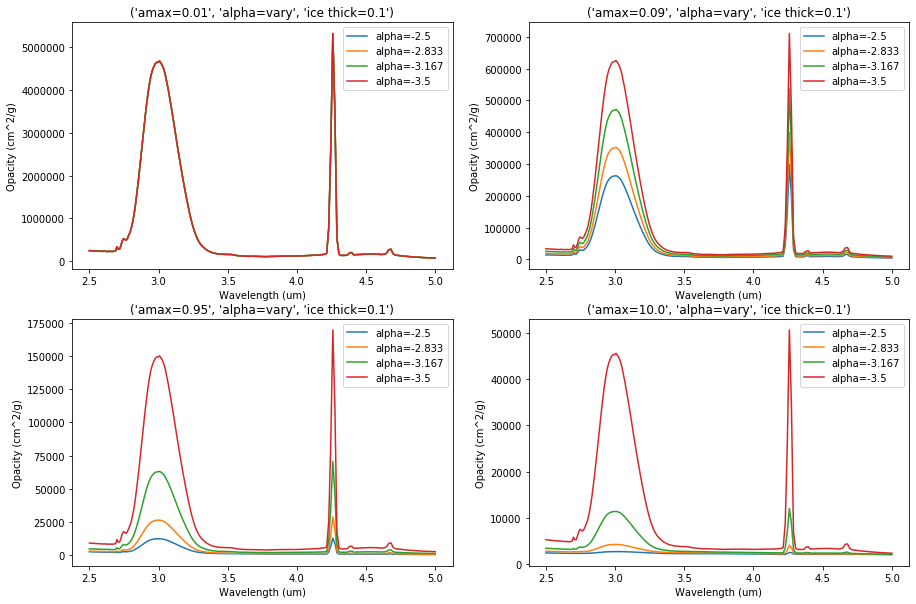

In [51]:
# vary alpha, change amax. ice thickness = 0.1
create_grid([(0,"vary",0),(9,"vary",0),(19,"vary",0),(29,"vary",0)])

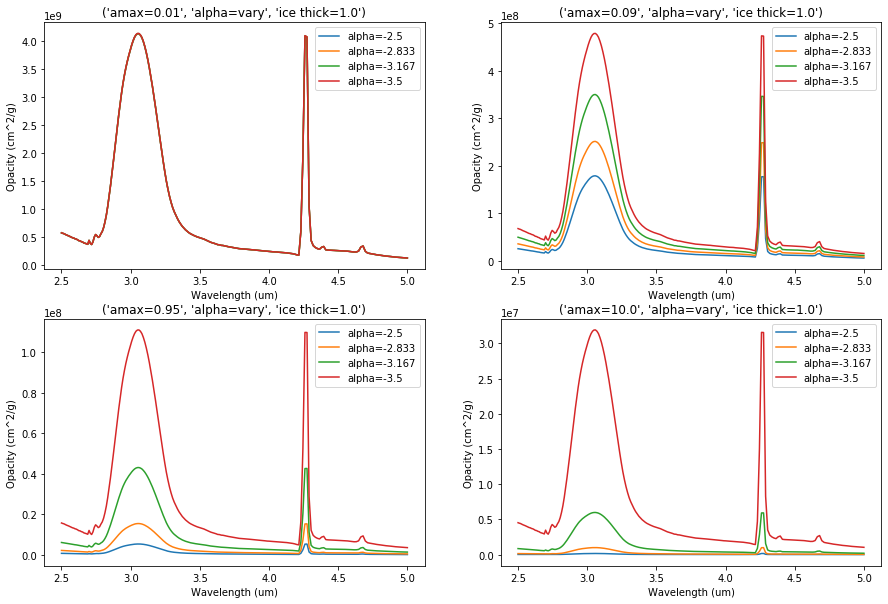

In [52]:
# vary alpha, change amax. ice thickness = 1.0
create_grid([(0,"vary",9),(9,"vary",9),(19,"vary",9),(29,"vary",9)])

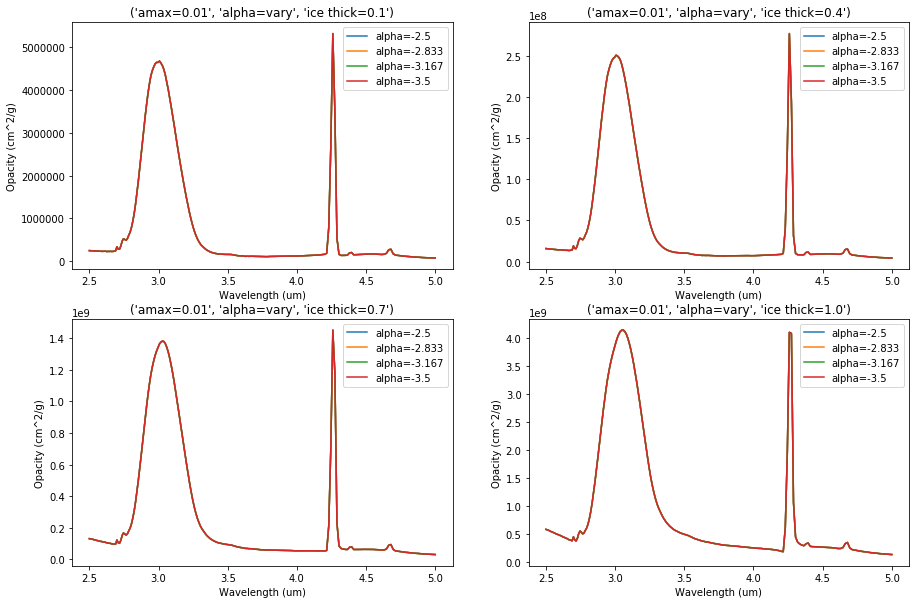

In [53]:
# vary alpha, change ice thickness. amax = 0.01
create_grid([(0,"vary",0),(0,"vary",3),(0,"vary",6),(0,"vary",9)])

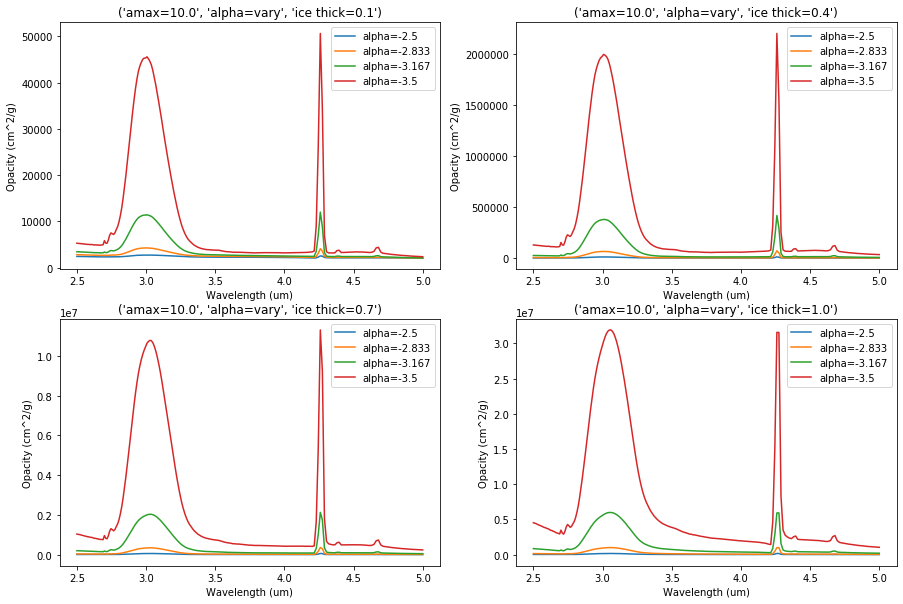

In [54]:
# vary alpha, change ice thickness. amax = 10
create_grid([(29,"vary",0),(29,"vary",3),(29,"vary",6),(29,"vary",9)])

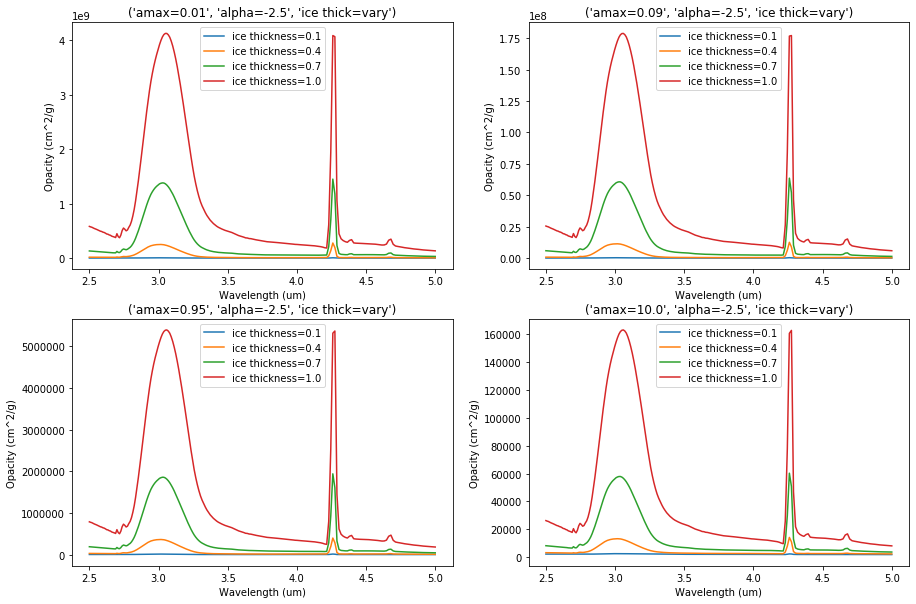

In [55]:
# vary ice thickness, change amax. alpha = -2.5
create_grid([(0,0,"vary"),(9,0,"vary"),(19,0,"vary"),(29,0,"vary")])

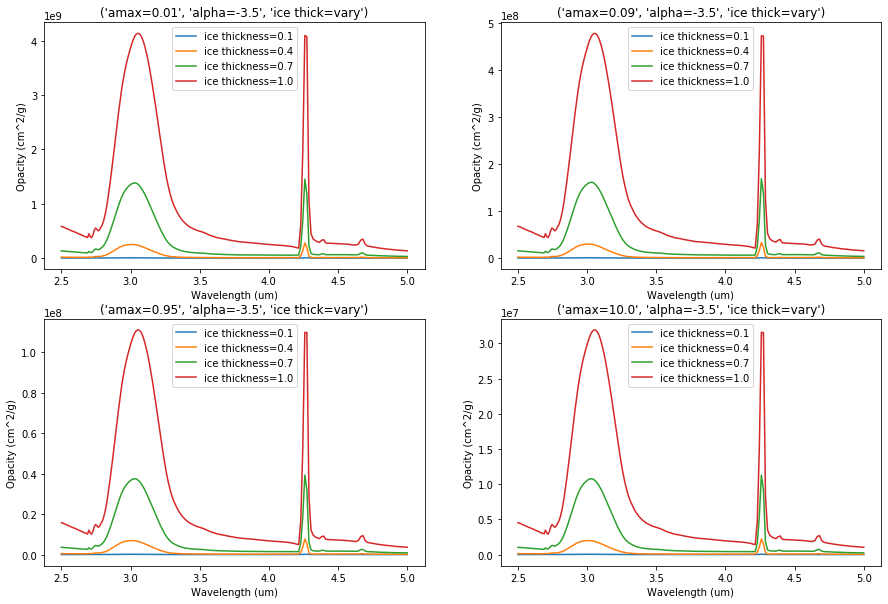

In [56]:
# vary ice thickness, change amax. alpha = -3.5
create_grid([(0,9,"vary"),(9,9,"vary"),(19,9,"vary"),(29,9,"vary")])

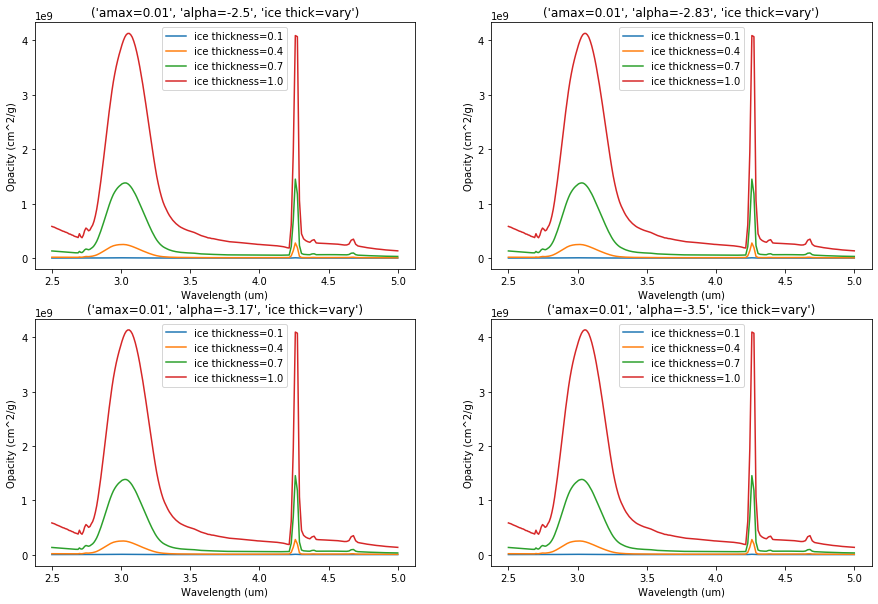

In [57]:
# vary ice thickness, change alpha. amax = 0.011
create_grid([(0,0,"vary"),(0,3,"vary"),(0,6,"vary"),(0,9,"vary")])

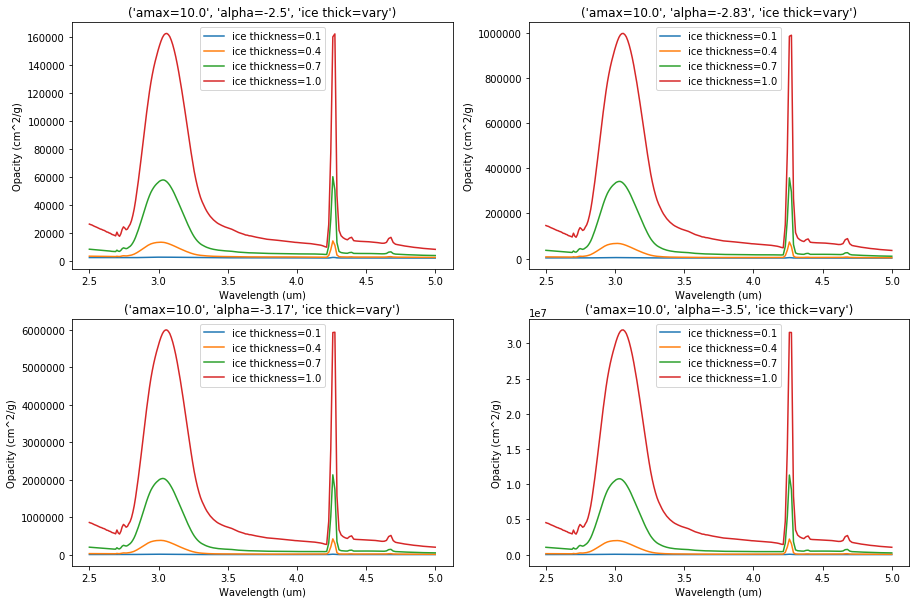

In [58]:
# vary ice thickness, change alpha. amax = 10
create_grid([(29,0,"vary"),(29,3,"vary"),(29,6,"vary"),(29,9,"vary")])

In [59]:
def create_grid(inp):
    title0,ids0,labels0,x0,y0,params0 = plot_model(inp[0][0],inp[0][1],inp[0][2])
    title1,ids1,labels1,x1,y1,params1 = plot_model(inp[1][0],inp[1][1],inp[1][2])
    title2,ids2,labels2,x2,y2,params2 = plot_model(inp[2][0],inp[2][1],inp[2][2])
    title3,ids3,labels3,x3,y3,params3 = plot_model(inp[3][0],inp[3][1],inp[3][2])
    titles = (title0,title1,title2,title3)
    ids = (ids0,ids1,ids2,ids3)
    labels = (labels0,labels1,labels2,labels3)
    xs = (x0,x1,x2,x3)
    ys = (y0,y1,y2,y3)
    params = (params0,params1,params2,params3)

    fig=plt.figure(1,figsize=(15,10))
    ax0 = fig.add_subplot(2,2,1)
    ax1 = fig.add_subplot(2,2,2)
    ax2 = fig.add_subplot(2,2,3)
    ax3 = fig.add_subplot(2,2,4)
    axs = (ax0,ax1,ax2,ax3)
    for i in range(4):
        idlist = ids[i]
        for i_vary in range(len(idlist)):
            axs[i].plot(xs[i], ys[i][idlist[i_vary]],label=labels[i][i_vary])
        axs[i].set(title=titles[i],xlabel="Wavelength (um)", 
                   ylabel="Opacity (cm^2/g)")
        axs[i].legend()
   #     axs[i].set_ylim(0,50000)
        
def save_grid(inp):
    create_grid(inp)
  #  plt.savefig("vary_icethick.png")

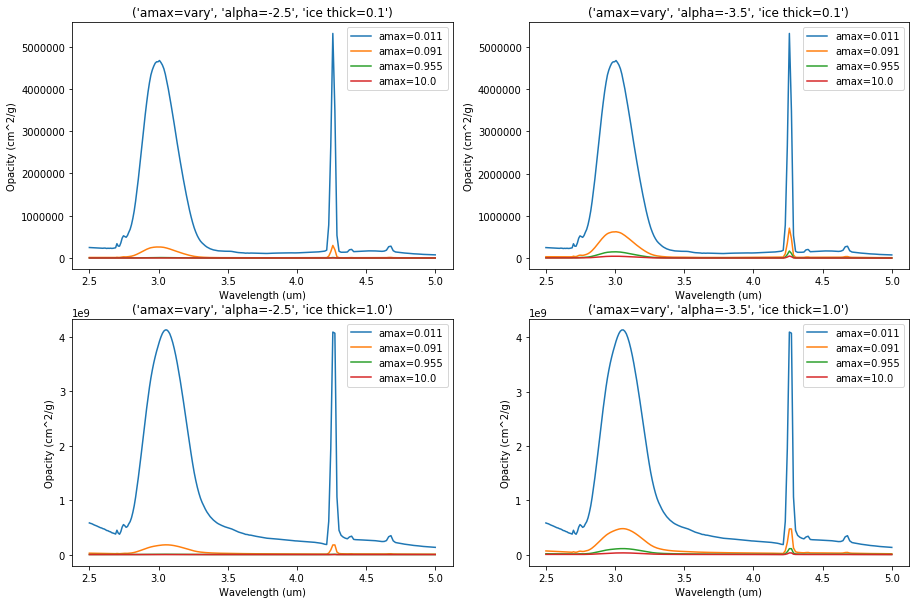

In [60]:
# increasing the size of the core causes opacity to decrease
# increasing ice thickness causes opacity to increase
# decreasing alpha causes opacity to increase

# vary amax summary:
save_grid([("vary",0,0),("vary",9,0),("vary",0,9),("vary",9,9)])

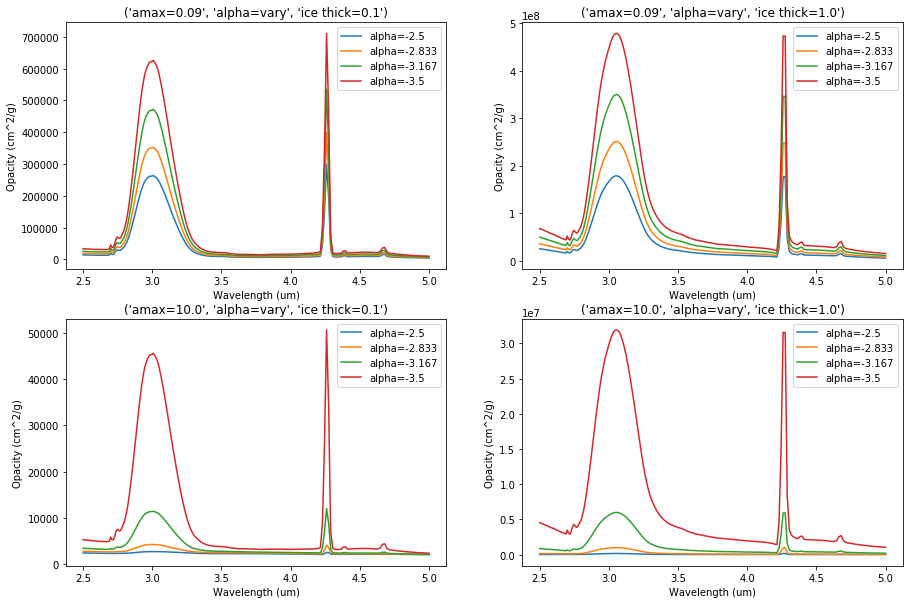

In [61]:
# vary alpha summary:
save_grid([(9,"vary",0),(9,"vary",9),(29,"vary",0),(29,"vary",9)])

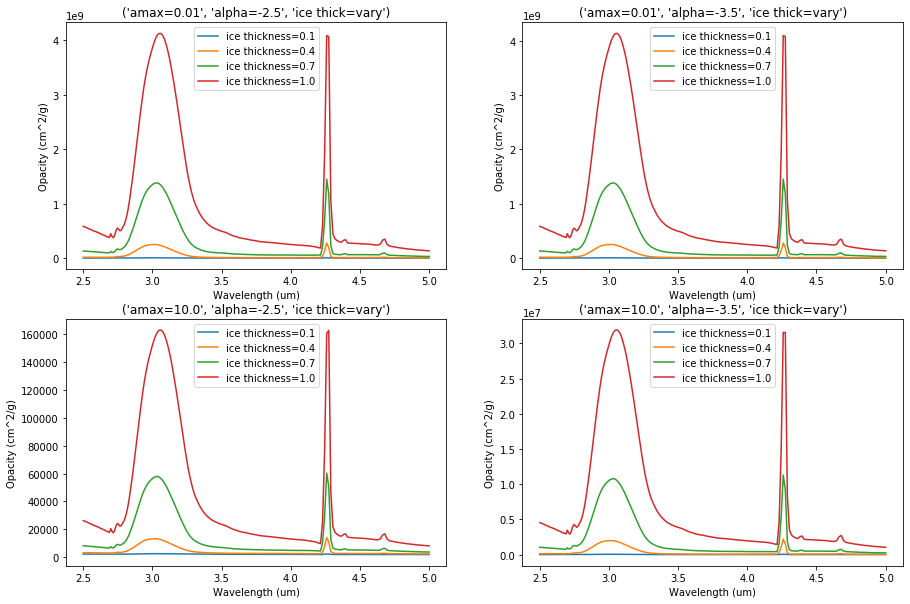

In [62]:
# ice thickness summary:
save_grid([(0,0,"vary"),(0,9,"vary"),(29,0,"vary"),(29,9,"vary")])

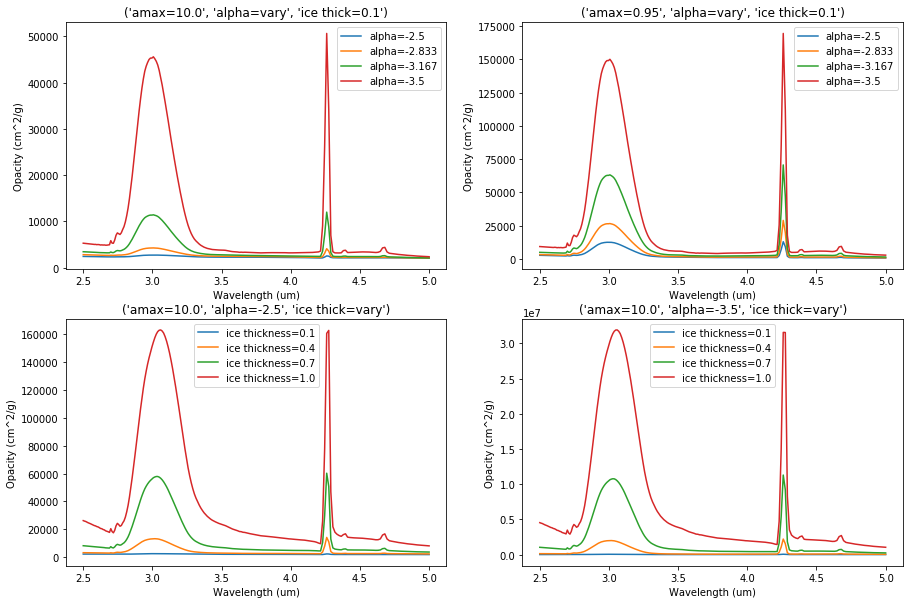

In [63]:
# hm
create_grid([(29,"vary",0),(19,"vary",0),(29,0,"vary"),(29,9,"vary")])

In [64]:
def create_subplots(inp):
    title0,ids0,labels0,x0,y0,params0 = plot_model(inp[0][0],inp[0][1],inp[0][2])
    title1,ids1,labels1,x1,y1,params1 = plot_model(inp[1][0],inp[1][1],inp[1][2])
    titles = (title0,title1)
    ids = (ids0,ids1)
    labels = (labels0,labels1)
    xs = (x0,x1)
    ys = (y0,y1)
    params = (params0,params1)

    fig=plt.figure(1,figsize=(15,10))
    ax0 = fig.add_subplot(2,2,1)
    ax1 = fig.add_subplot(2,2,2)
    axs = (ax0,ax1)
    for i in range(2):
        idlist = ids[i]
        for i_vary in range(len(idlist)):
            axs[i].plot(xs[i], ys[i][idlist[i_vary]],label=labels[i][i_vary])
        axs[i].set(title=titles[i],xlabel="Wavelength (um)", 
                   ylabel="Opacity (cm^2/g)")
        axs[i].legend()
        
  #  plt.savefig("ice_extinction.png")

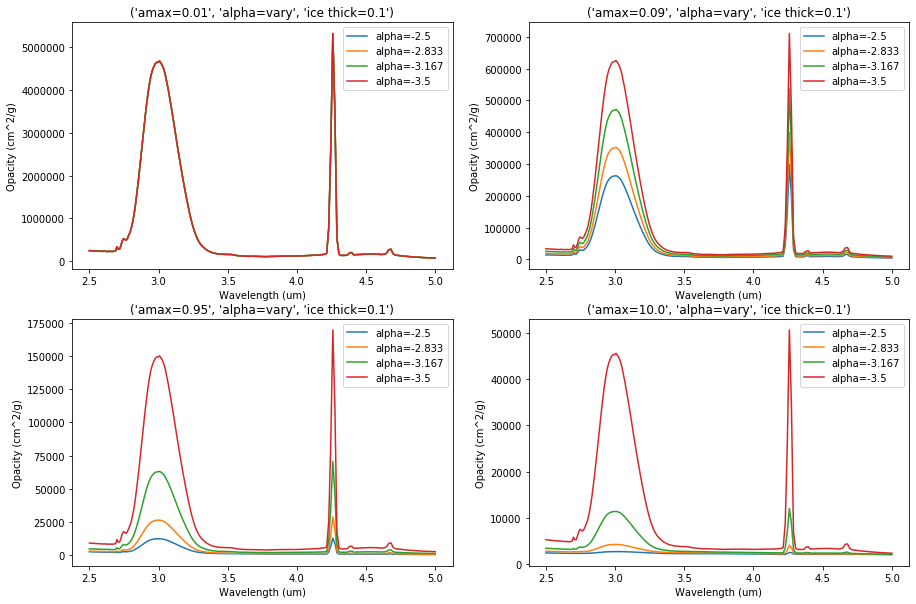

In [65]:
# vary alpha, change amax. ice thickness = 0.1
create_grid([(0,"vary",0),(9,"vary",0),(19,"vary",0),(29,"vary",0)])

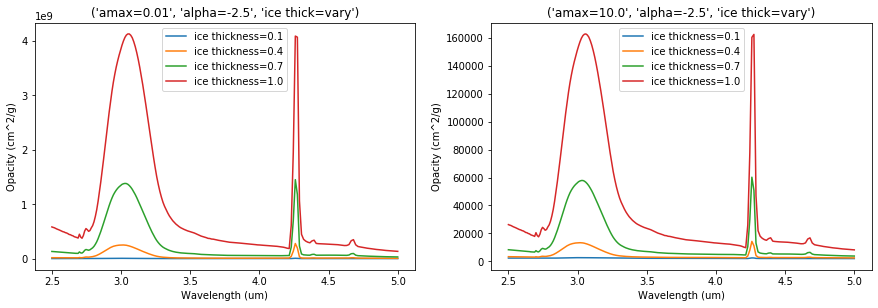

In [66]:
# vary ice thickness, change amax. alpha = -2.5
# create_grid([(0,0,"vary"),(9,0,"vary"),(19,0,"vary"),(29,0,"vary")])
create_subplots([(0,0,"vary"),(29,0,"vary")])

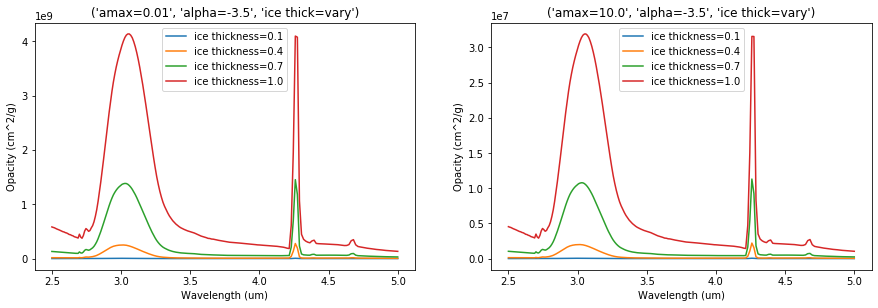

In [67]:
# vary ice thickness, change amax. alpha = -3.5
create_subplots([(0,9,"vary"),(29,9,"vary")])

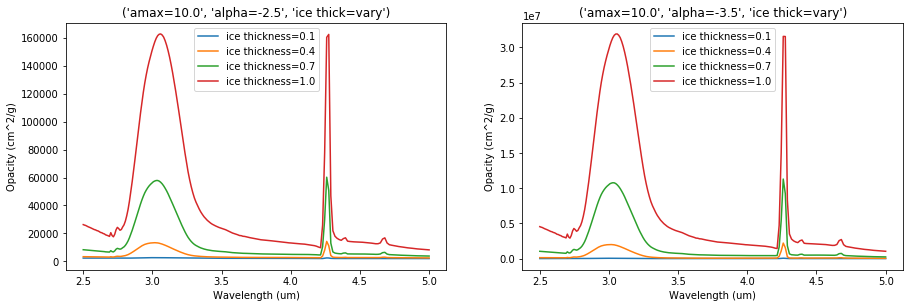

In [68]:
# vary ice thickness, change alpha. amax = 10
create_subplots([(29,0,"vary"),(29,9,"vary")])

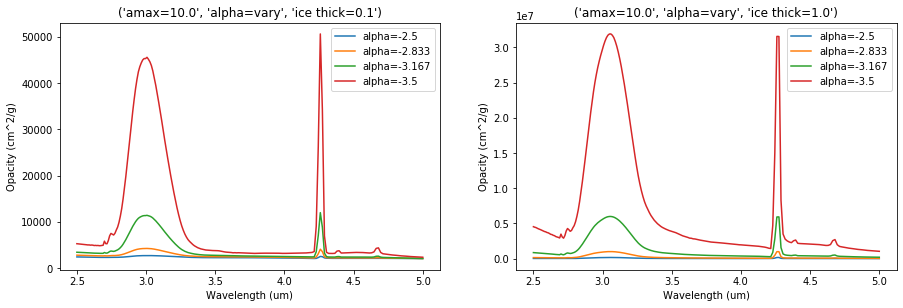

In [69]:
create_subplots([(29,"vary",0),(29,"vary",9)])

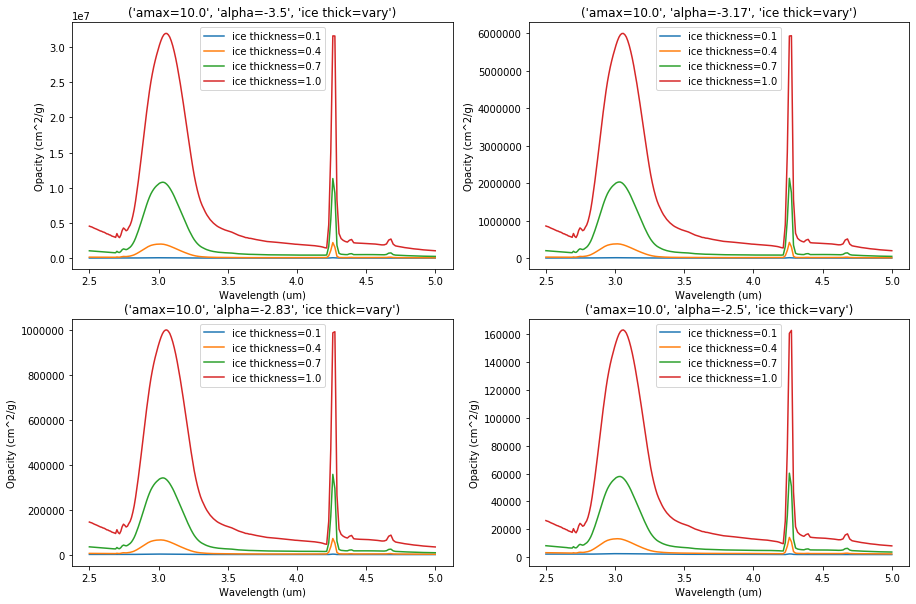

In [70]:
# vary ice thickness, change alpha. amax = 10
# avg smallest to largest cores
create_grid([(29,9,"vary"),(29,6,"vary"),(29,3,"vary"),(29,0,"vary")])

In [71]:
def plot_opac(amax_ind,alpha_ind,ice_thick_ind):
    file_id = (amax_ind*100)+(alpha_ind*10)+ice_thick_ind
    data_raw = fits.getdata('jw_ice/opacities/opacity_'+str(file_id)+'.fits')
    waves = data_raw['wavelength']
    cexts = data_raw['cext']
    
    # calculate band strength
    nus = 1/(waves*1e-4) #wavenumber (cm^-1)
    A = simpson(cexts,x=nus)
    print("band strength =", A)
    
    amax = str(round(all_pars[1][amax_ind],2))
    alpha = str(round(all_pars[2][alpha_ind],2))
    ice_thick = str(round(all_pars[3][ice_thick_ind],2))
    label=["amax="+amax,"alpha=",alpha,"ice thick=",ice_thick]
    
    fig=plt.figure(1,figsize=(10,6))
    ax1=fig.add_subplot(111)
    ax1.plot(waves,cexts)
    ax1.set_title(title,fontsize=16)
    ax1.set_xlabel("Wavelength (um)",fontsize=16)
    ax1.set_ylabel("Opacity (cm^2/g)",fontsize=16)
    

band strength = -1882998658.0656433


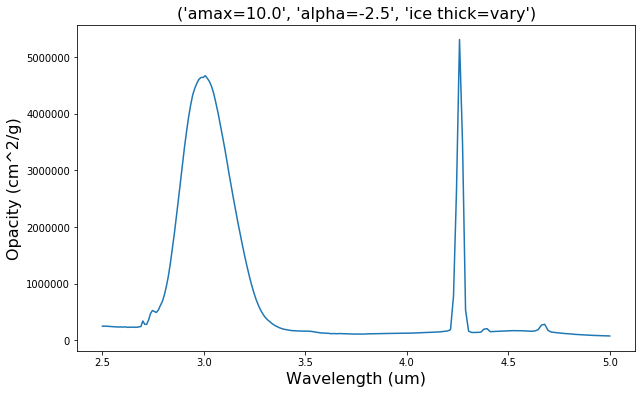

In [72]:
plot_opac(0,0,0)

In [73]:
def amax_bands(amax="vary",alpha_ind=0,ice_thick_ind=0):
    ids = []
    cexts = {}
    params = {}
    amaxs=all_pars[1]
    for i in np.arange(0,30,1):
        id_ = (i*100)+(alpha_ind*10)+ice_thick_ind
        ids.append(id_)
        
        # import data
        data_raw = fits.getdata('jw_ice/opacities/opacity_'+str(id_)+'.fits')
        waves = data_raw['wavelength']
        cexts[id_] = data_raw['cext']
        params[id_] = (master_iter_withid[id_])
    
    # calculate band strength
    nus = 1/(waves*1e-4) #wavenumber (cm^-1)
    nus = np.flip(nus) #list must be in increasing order for integration

    As = []
    mu = 3e-23 #[g/molecule H2O]
    for i in np.arange(0,30,1):
        band = simpson(cexts[ids[i]],x=nus) #[cm g^-1]
        A = band*mu
        As.append(A)

    fig=plt.figure(1,figsize=(10,6))
    ax1=fig.add_subplot(111)
    ax1.plot(amaxs,As) 

    ax1.set_title("band strength vs. grain size",fontsize=16)
    ax1.set_xlabel("grain diameter (um)",fontsize=16)
    ax1.set_ylabel("Band strength",fontsize=16)
    ax1.set_xscale('log')

band strength = -1882998658.0656433


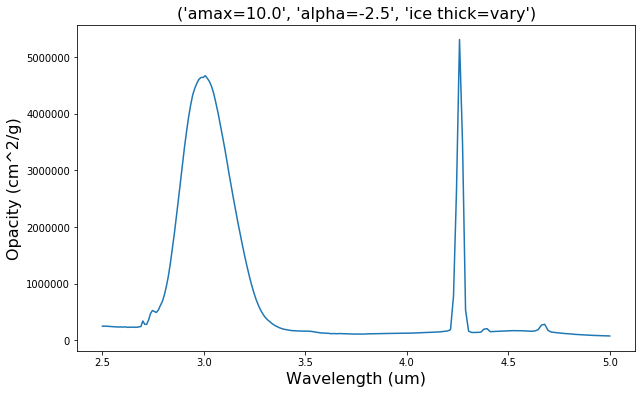

In [74]:
# estimate integral
plot_opac(0,0,0)

In [75]:
# around 4000 cm^2/g by 0.5 microns?
# microns to cm^-1
x = (1/(0.5e-4))
print(x)
xy = x*4000 #cm^2/g cm^-1 = cm/g
print(xy,"cm/g") 
# integral: 8 x 10^7 cm/g
mu = 3e-23 #[g/molecule H2O]
print(xy*mu,"cm/molecule")

20000.0
80000000.0 cm/g
2.4e-15 cm/molecule


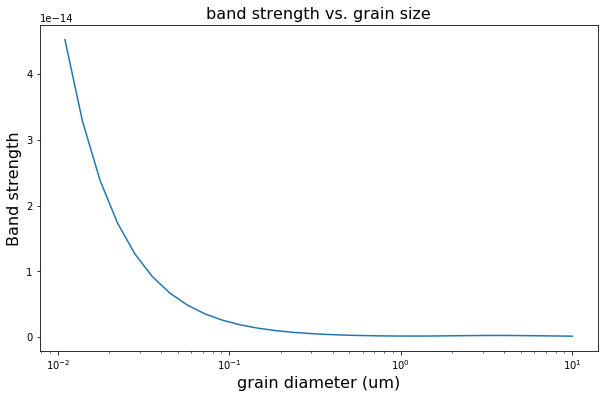

In [76]:
amax_bands("vary",0,0)

In [77]:
def calc_bands1(amax_ind="vary",alpha_ind=0,ice_thick_ind=0):
    ids = []
    if amax_ind == "vary":
        xs=all_pars[1]
        for i in np.arange(0,30,1):
            id_ = (i*100)+(alpha_ind*10)+ice_thick_ind
            ids.append(id_)  
        indf = 30
    if alpha_ind == "vary":
        xs=all_pars[2]
        for i in np.arange(0,10,1):
            id_ = (amax_ind*100)+(i*10)+ice_thick_ind
            ids.append(id_)
        indf = 10
    elif ice_thick_ind == "vary":
        xs=all_pars[3]
        for i in np.arange(0,10,1):
            id_ = (amax_ind*100)+(alpha_ind*10)+i
            ids.append(id_)
        indf = 10
    cexts = {}
    params = {}
    ratios=[]
    for i in np.arange(0,indf,1):
        # import data
        data_raw = fits.getdata('jw_ice/opacities/opacity_'+str(ids[i])+'.fits')
        waves = data_raw['wavelength']
        hdulist = fits.open('jw_ice/opacities/opacity_'+str(ids[i])+'.fits')
        ratio = hdulist[1].header["ratio"]
        ratios.append(ratio)        
        cexts[ids[i]] = data_raw['cext']
        params[ids[i]] = (master_iter_withid[id_])
    
    # convert wavelength to wavenumber
    nus = 1/(waves*1e-4) #wavenumber (cm^-1)
    nus = np.flip(nus) #list must be in increasing order for integration

    # calculate band strength
    As = []
    mu = 3e-23 #[g/molecule H2O]
    bands=[]
    for i in np.arange(0,indf,1):
        band = simpson(cexts[ids[i]],x=nus) #[cm g^-1]
        bands.append(band)
        
        # convert from cm/g rock to cm/g ice
        A = band/ratios[i] #each ratio is total mass ice/total mass solid core
    
        
        # convert from cm/gice combo to just cm/g H2O ice
        A /= 100/123 #g H2O/g total ice (APPROX)
        
        A *= mu #[cm/molec]
        
        As.append(A) 

    Alab = 2e-16 #[cm/molec H2O]
    A_Alab = [A / Alab for A in As]
    
    fig=plt.figure(1,figsize=(10,6))
    ax1=fig.add_subplot(111)
    ax1.plot(ratios,bands)
    ax1.set_xscale('log')
    
 #   ax1.plot(xs,As)
    
    
 #   ax1.plot(xs,A_Alab)
 #   ax1.text(xs[2],A_Alab[2],"H$_2$O band strength~ "+str(Alab)+" cm/molec",fontsize=12)
    
"""
    if amax_ind == "vary":
        ax1.set_title("effective band strength vs. grain size",fontsize=16)
        ax1.set_xlabel("grain diameter (um)",fontsize=16)
        ax1.set_xscale("log")
    elif alpha_ind == "vary":
        ax1.set_title("effective band strength vs. power law index",fontsize=16)
        ax1.set_xlabel("alpha",fontsize=16)
    elif ice_thick_ind == "vary":
        ax1.set_title("effective band strength vs. ice thickness",fontsize=16)
        ax1.set_xlabel("ice mantle thickness (microns)",fontsize=16)
    ax1.set_ylabel("Aeff",fontsize=16)
  #  ax1.set_xscale('log')
"""

'\n    if amax_ind == "vary":\n        ax1.set_title("effective band strength vs. grain size",fontsize=16)\n        ax1.set_xlabel("grain diameter (um)",fontsize=16)\n        ax1.set_xscale("log")\n    elif alpha_ind == "vary":\n        ax1.set_title("effective band strength vs. power law index",fontsize=16)\n        ax1.set_xlabel("alpha",fontsize=16)\n    elif ice_thick_ind == "vary":\n        ax1.set_title("effective band strength vs. ice thickness",fontsize=16)\n        ax1.set_xlabel("ice mantle thickness (microns)",fontsize=16)\n    ax1.set_ylabel("Aeff",fontsize=16)\n  #  ax1.set_xscale(\'log\')\n'

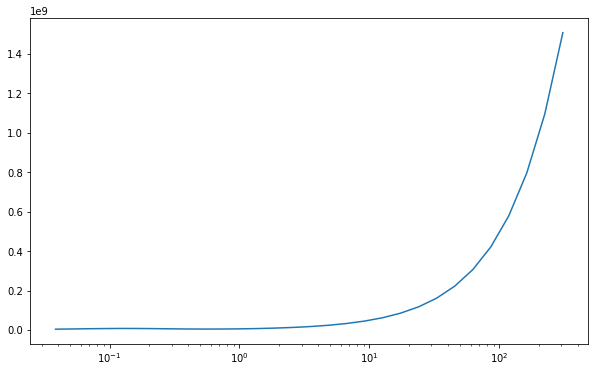

In [78]:
calc_bands1("vary",0,0)

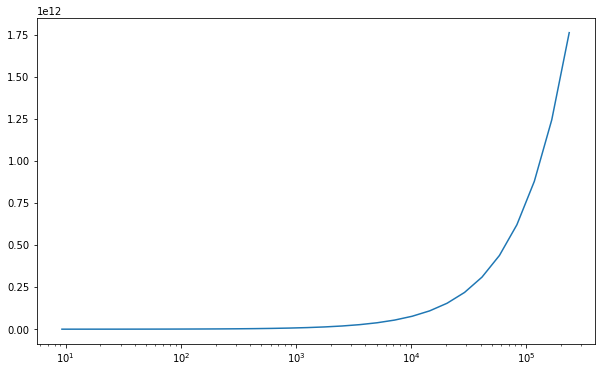

In [79]:
calc_bands1("vary",0,9)

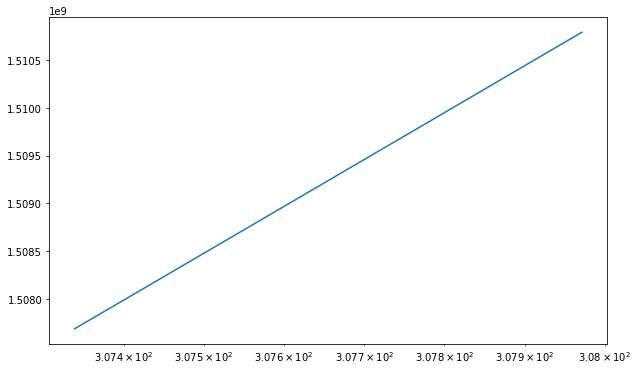

In [80]:
calc_bands1(0,"vary",0)

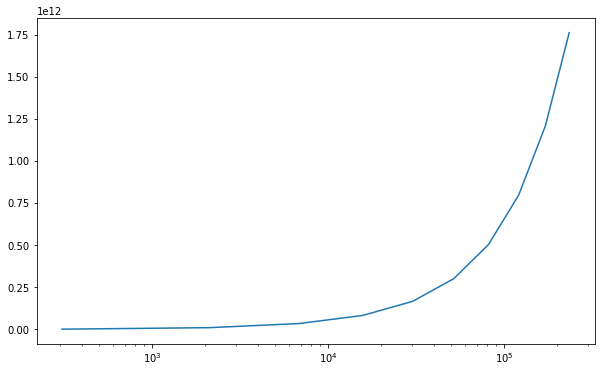

In [81]:
calc_bands1(0,0,"vary")

In [82]:
title,ids,labels,xs,A_Alab,params,Alab,ind,ratios = plot_model("vary",0,0,band='True')
ratios

[307.3387696627636,
 223.2250408525618,
 162.2263807349004,
 117.9291234072427,
 85.73013980284314,
 62.31322582227893,
 45.28086527041435,
 32.89444769967901,
 23.89017639260788,
 17.34789124748566,
 12.59702989519509,
 9.148810189638388,
 6.647063703321754,
 4.832441062847492,
 3.516276458415629,
 2.561473749096062,
 1.868520869276099,
 1.365260864576279,
 0.9994185245867334,
 0.7331484250557686,
 0.5390644266930962,
 0.3973531875961747,
 0.2936793144136646,
 0.2176674077437683,
 0.1618036184451145,
 0.1206416561452839,
 0.09022934823869588,
 0.06769471896424199,
 0.05094729667838782,
 0.03846257110813611]

In [83]:
def ratios_grid(inp):
    title0,ids0,labels0,x0,y0,params0,Alab,ind,ratios0 = plot_model(inp[0][0],inp[0][1],inp[0][2],band='True')
    title1,ids1,labels1,x1,y1,params1,Alab,ind,ratios1 = plot_model(inp[1][0],inp[1][1],inp[1][2],band='True')
    title2,ids2,labels2,x2,y2,params2,Alab,ind,ratios2 = plot_model(inp[2][0],inp[2][1],inp[2][2],band='True')
    title3,ids3,labels3,x3,y3,params3,Alab,ind,ratios3 = plot_model(inp[3][0],inp[3][1],inp[3][2],band='True')
    titles = (title0,title1,title2,title3)
    xs = (x0,x1,x2,x3)
    rs = (ratios0,ratios1,ratios2,ratios3)
    ys = (y0,y1,y2,y3)
    ys_new=ys
    
    fig=plt.figure(1,figsize=(15,10))
    ax0 = fig.add_subplot(2,2,1)
    ax1 = fig.add_subplot(2,2,2)
    ax2 = fig.add_subplot(2,2,3)
    ax3 = fig.add_subplot(2,2,4)
    axs = (ax0,ax1,ax2,ax3)
    for i in range(4):
        
        for ind in range(len(ys[i])):
            ys_new[i][ind] = ys[i][ind]*rs[i][ind]*Alab
        
     #   axs[i].plot(xs[i], rs[i])
     #   axs[i].plot(xs[i], rs[i],'o')
        
        axs[i].plot(rs[i], ys_new[i])
        axs[i].plot(rs[i], ys_new[i],'o')
        axs[i].plot(rs[i], ys[i])
        axs[i].plot(rs[i], ys[i],'o')
        
    #    axs[i].set_ylim(-10,10)
        plt.title("relative band strength vs. ice-to-rock ratio",fontsize=16)
        axs[i].set(title=titles[i],xlabel="ice-to-rock ratio",
                    ylabel="band strength")
        axs[i].set_xscale("log")

\begin{equation}
band =\int \kappa_\mathrm{out} \mu_\mathrm{ice}  d\tilde{\nu}
\end{equation}

band vs. ice-to-rock ratio

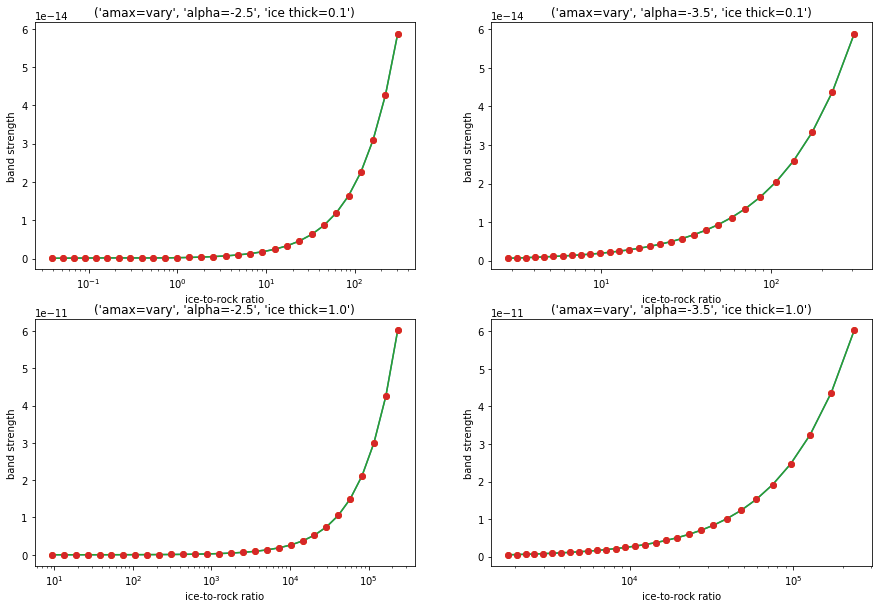

In [84]:
ratios_grid([("vary",0,0),("vary",9,0),("vary",0,9),("vary",9,9)])

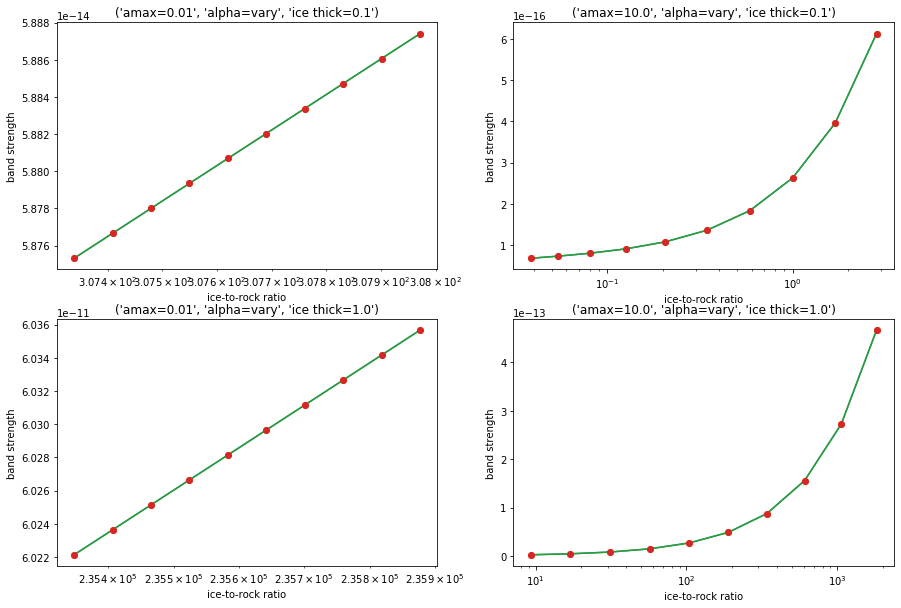

In [85]:
ratios_grid([(0,"vary",0),(29,"vary",0),(0,"vary",9),(29,"vary",9)])

In [86]:
def band_grid(inp):
    title0,ids0,labels0,x0,y0,params0,Alab,ind,ratios0 = plot_model(inp[0][0],inp[0][1],inp[0][2],band='True')
    title1,ids1,labels1,x1,y1,params1,Alab,ind,ratios1 = plot_model(inp[1][0],inp[1][1],inp[1][2],band='True')
    title2,ids2,labels2,x2,y2,params2,Alab,ind,ratios2 = plot_model(inp[2][0],inp[2][1],inp[2][2],band='True')
    title3,ids3,labels3,x3,y3,params3,Alab,ind,ratios3 = plot_model(inp[3][0],inp[3][1],inp[3][2],band='True')
    titles = (title0,title1,title2,title3) 
    ids = (ids0,ids1,ids2,ids3)
    labels = (labels0,labels1,labels2,labels3)
    xs = (x0,x1,x2,x3)
    ys = (y0,y1,y2,y3)

    params = (params0,params1,params2,params3)
    ratios = (ratios0,ratios1,ratios2,ratios3)
    
    fig=plt.figure(1,figsize=(15,10))
    ax0 = fig.add_subplot(2,2,1)
    ax1 = fig.add_subplot(2,2,2)
    ax2 = fig.add_subplot(2,2,3)
    ax3 = fig.add_subplot(2,2,4)
    axs = (ax0,ax1,ax2,ax3)
    for i in range(4):
        axs[i].plot(xs[i], ys[i])
        axs[i].plot(xs[i], ys[i],'o')
        axs[i].axhline(y=1,linestyle='--')
        
        axs[i].set_ylim(-10,10)
        if ind[0] == 1:
            plt.title("relative band strength vs. grain size",fontsize=16)
            axs[i].set(title=titles[i],xlabel="core diameter (um)",
                       ylabel="A /A Lab")
            s = (ys[i][-1]-ys[i][0])/(xs[i][-1]-xs[i][0])
            axs[i].text(xs[i][1],ys[i][1],"avg slope ~ "+str(round(s,4)))
            axs[i].set_xscale("log")
        elif ind[0] == 2:
            
            plt.title("relative band strength vs. power law index",fontsize=16)
            s = (ys[i][-1]-ys[i][0])/(xs[i][-1]-xs[i][0])
            axs[i].text(xs[i][3],ys[i][0],"slope ~ "+str(round(s,4)))
            axs[i].set(title=titles[i],xlabel="alpha",
                       ylabel="A /A Lab")
        elif ind[0] == 3:
            plt.title("relative band strength vs. ice thickness",fontsize=16)
            axs[i].set(title=titles[i],xlabel="ice mantle thickness (microns)",
                       ylabel="A /A Lab")
            s = (ys[i][-1]-ys[i][0])/(xs[i][-1]-xs[i][0])
            axs[i].text(xs[i][1],ys[i][0],"avg slope ~ "+str(round(s,4)))
  #  plt.savefig("avcore.png")
    

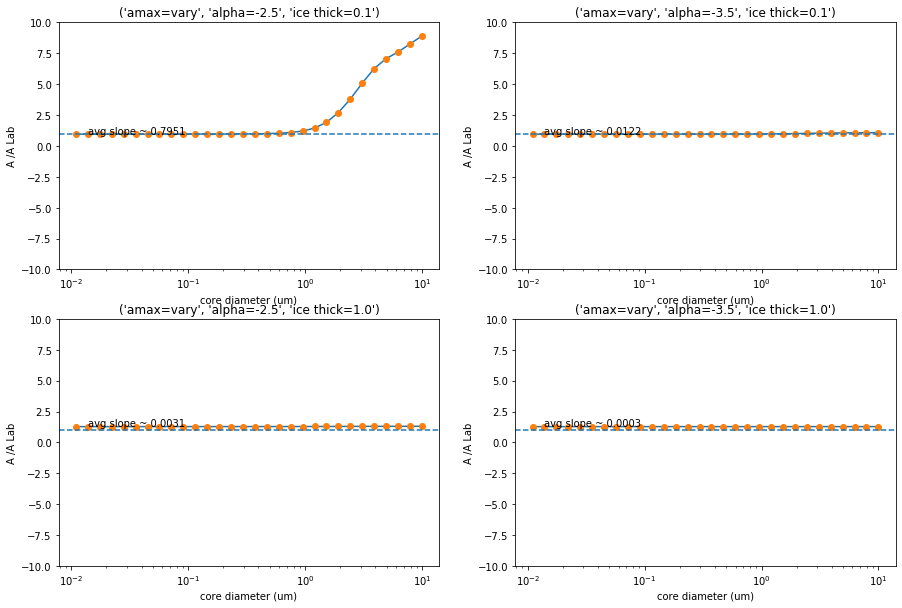

In [87]:
band_grid([("vary",0,0),("vary",9,0),("vary",0,9),("vary",9,9)])

When the ice mantle is thick, band strengths closely match lab data. However, when there is very little ice, grains with large cores have much greater band strengths.

For very large grains, the ice to rock ratio decreases while band strength remains the same.

\begin{align}
    A_\mathrm{eff} &=\frac{1}{N_\mathrm{ice}} \int \kappa_\mathrm{out} N_\mathrm{ice} \mu_\mathrm{ice} / i2r\ 
    d\tilde{\nu}\\
    &=\int \kappa_\mathrm{out} \mu_\mathrm{ice} / i2r\  d\tilde{\nu}
\end{align}

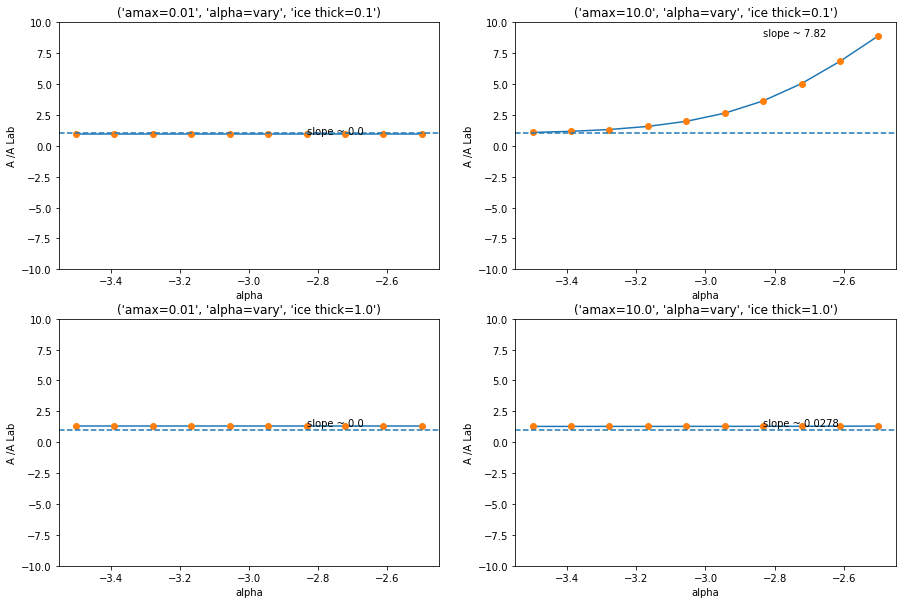

In [88]:
band_grid([(0,"vary",0),(29,"vary",0),(0,"vary",9),(29,"vary",9)])

Grains with large cores and thin ice mantles have diverging band strengths. However, decreasing the power law index of the grain size distribution lessens the quantities of large grains, and mimics a distribution with smaller grains, where band strength matches lab data.

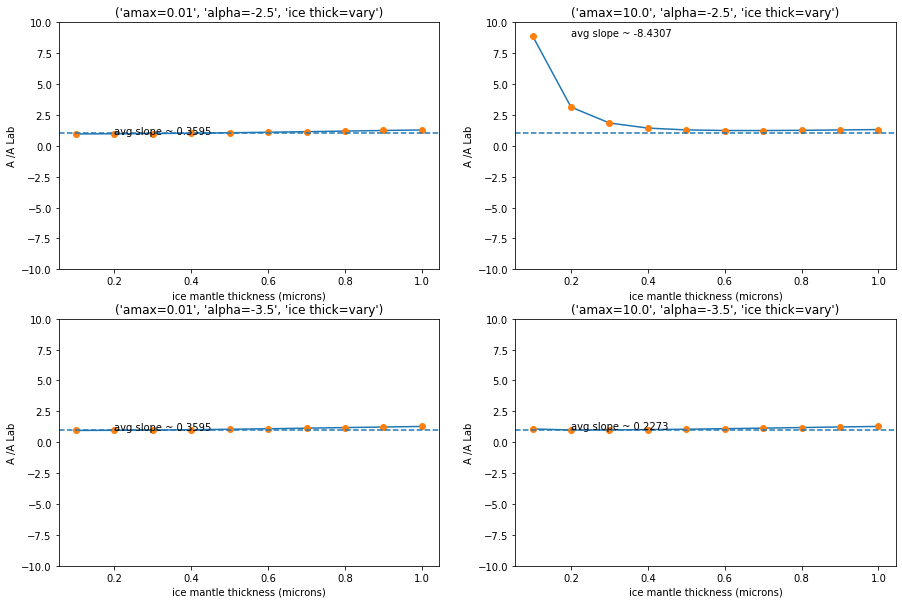

In [89]:
band_grid([(0,0,"vary"),(29,0,"vary"),(0,9,"vary"),(29,9,"vary")])

It does not work for large grains with thin ice mantles.



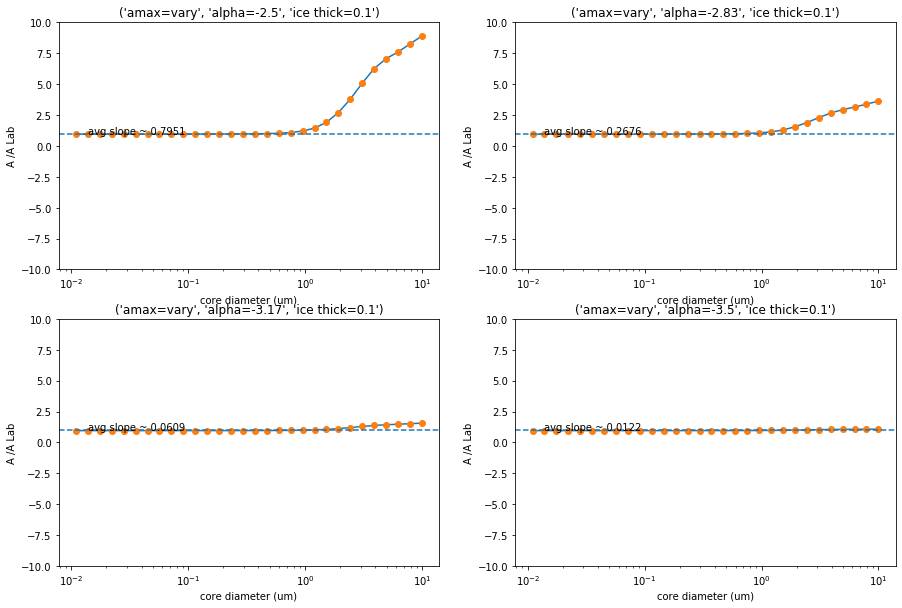

In [90]:
band_grid([("vary",0,0),("vary",3,0),("vary",6,0),("vary",9,0)])

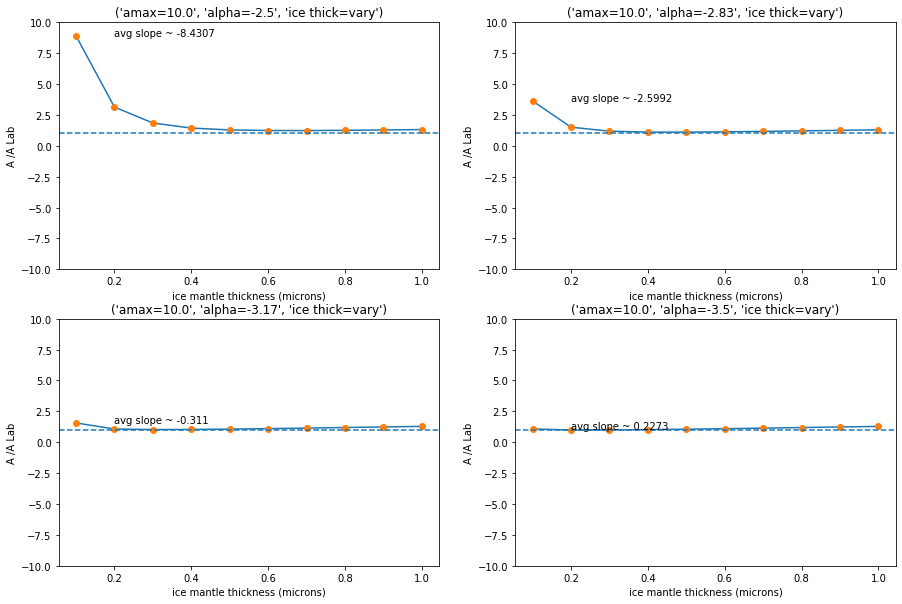

In [91]:
band_grid([(29,0,"vary"),(29,3,"vary"),(29,6,"vary"),(29,9,"vary")])

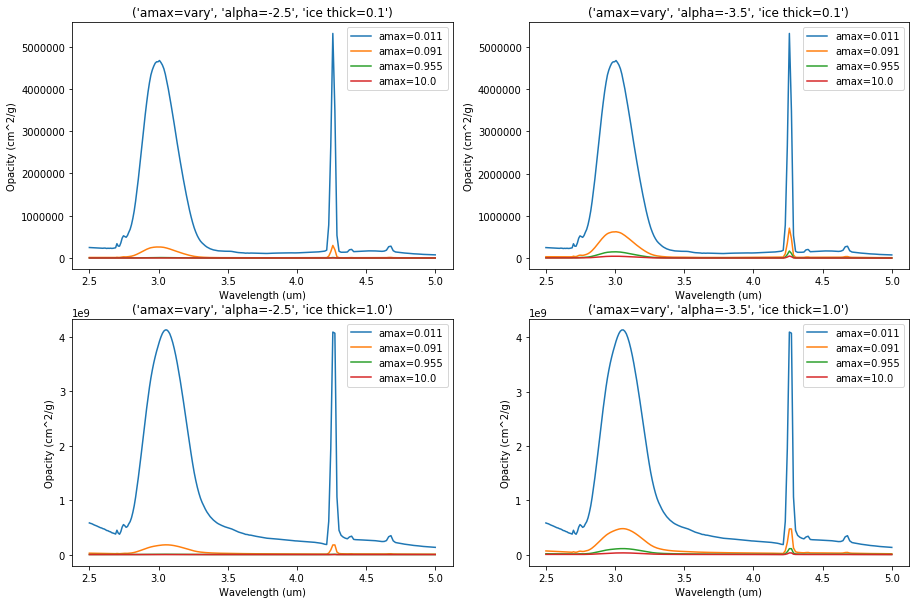

In [92]:
create_grid([("vary",0,0),("vary",9,0),("vary",0,9),("vary",9,9)])

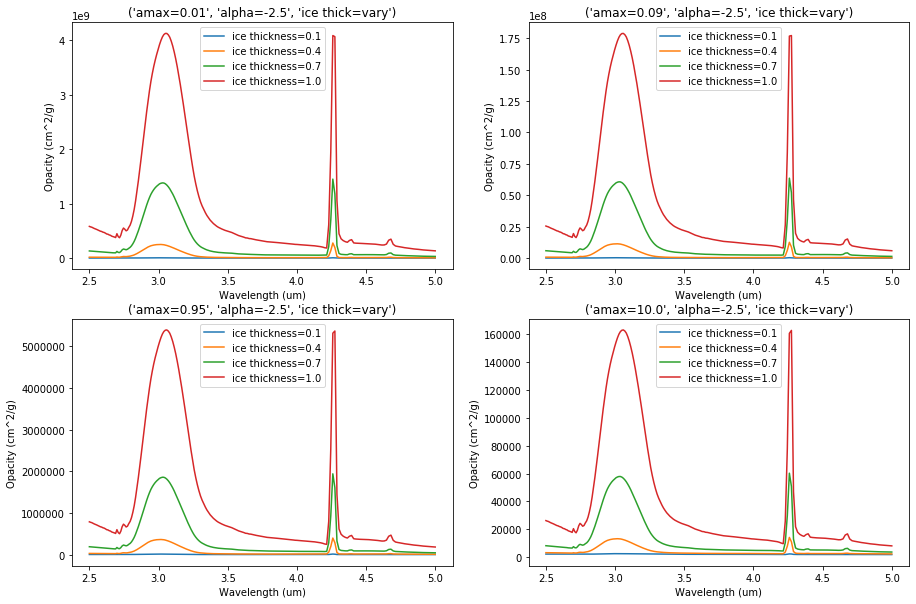

In [93]:
create_grid([(0,0,"vary"),(9,0,"vary"),(19,0,"vary"),(29,0,"vary")])

In [94]:
def band_grid1(inp):
    title0,ids0,labels0,x0,y0,params0,Alab,ind,ratios0 = plot_model(inp[0][0],inp[0][1],inp[0][2],band='True')
    title1,ids1,labels1,x1,y1,params1,Alab,ind,ratios1 = plot_model(inp[1][0],inp[1][1],inp[1][2],band='True')
    title2,ids2,labels2,x2,y2,params2,Alab,ind,ratios2 = plot_model(inp[2][0],inp[2][1],inp[2][2],band='True')
    title3,ids3,labels3,x3,y3,params3,Alab,ind,ratios3 = plot_model(inp[3][0],inp[3][1],inp[3][2],band='True')
    titles = (title0,title1,title2,title3) 
    ids = (ids0,ids1,ids2,ids3)
    labels = (labels0,labels1,labels2,labels3)
    xs = (x0,x1,x2,x3)
    ys = (y0,y1,y2,y3)
    params = (params0,params1,params2,params3)
    ratios = (ratios0,ratios1,ratios2,ratios3)

    fig=plt.figure(1,figsize=(15,10))
    ax0 = fig.add_subplot(2,2,1)
    ax1 = fig.add_subplot(2,2,2)
    ax2 = fig.add_subplot(2,2,3)
    ax3 = fig.add_subplot(2,2,4)
    axs = (ax0,ax1,ax2,ax3)
    for i in range(4):
        axs[i].plot(xs[i], ys[i])
        axs[i].plot(xs[i], ys[i],'o')
        axs[i].axhline(y=1,linestyle='--')
        
    #    axs[i].set_ylim(-10,10)
        if ind[0] == 1:
            plt.title("relative band strength vs. grain size",fontsize=16)
            axs[i].set(title=titles[i],xlabel="grain diameter (um)",
                       ylabel="A /A Lab")
            s = (ys[i][-1]-ys[i][0])/(xs[i][-1]-xs[i][0])
            axs[i].text(xs[i][1],ys[i][1],"avg slope ~ "+str(round(s,4)))
            axs[i].set_xscale("log")
        elif ind[0] == 2:
            
            plt.title("relative band strength vs. power law index",fontsize=16)
            s = (ys[i][-1]-ys[i][0])/(xs[i][-1]-xs[i][0])
            axs[i].text(xs[i][3],ys[i][0],"slope ~ "+str(round(s,4)))
            axs[i].set(title=titles[i],xlabel="alpha",
                       ylabel="A /A Lab")
        elif ind[0] == 3:
            plt.title("relative band strength vs. ice thickness",fontsize=16)
            axs[i].set(title=titles[i],xlabel="ice mantle thickness (microns)",
                       ylabel="A /A Lab")
            s = (ys[i][-1]-ys[i][0])/(xs[i][-1]-xs[i][0])
            axs[i].text(xs[i][1],ys[i][0],"avg slope ~ "+str(round(s,4)))
     #       print(ids[i])
  #  plt.savefig("Avmantle.png")
  

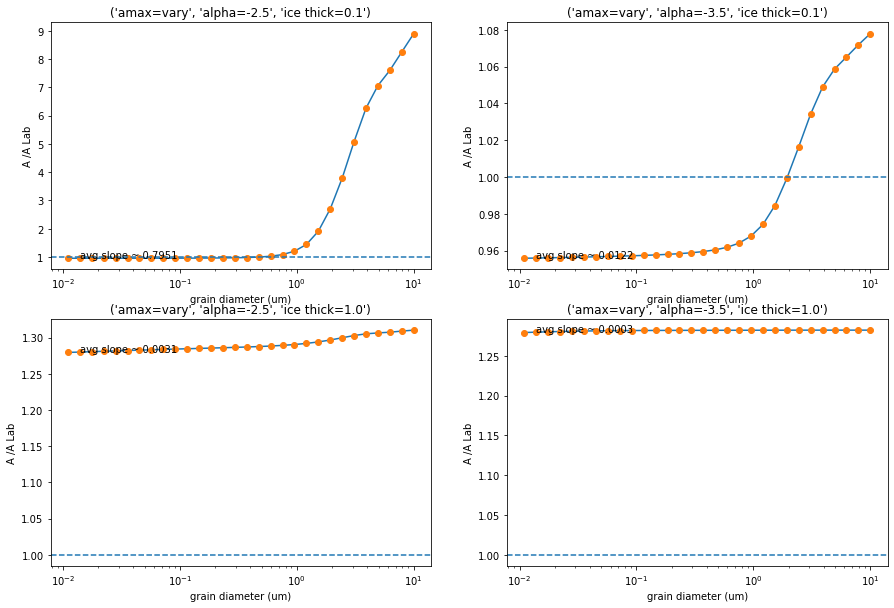

In [95]:
band_grid1([("vary",0,0),("vary",9,0),("vary",0,9),("vary",9,9)])

band strength increases for larger grains in all cases.

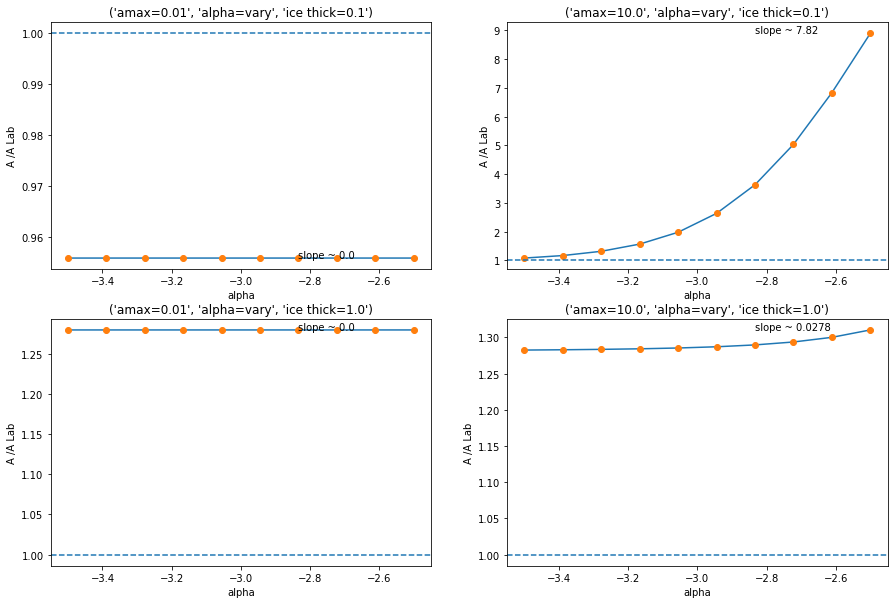

In [96]:
band_grid1([(0,"vary",0),(29,"vary",0),(0,"vary",9),(29,"vary",9)])

alphas closer to zero correspond to more large grains in the size distribution; band strength increases

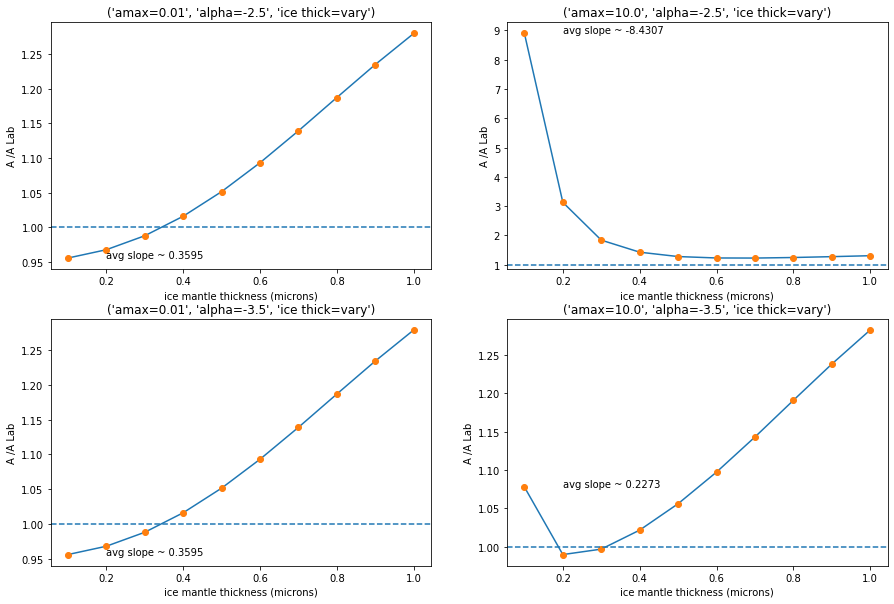

In [97]:
band_grid1([(0,0,"vary"),(29,0,"vary"),(0,9,"vary"),(29,9,"vary")])

when amax is small, band strength increases with ice thickness. this makes sense? 

When the core dominates the grain volume, the band strength is much larger; increasing ice decreases it closer to lab values.

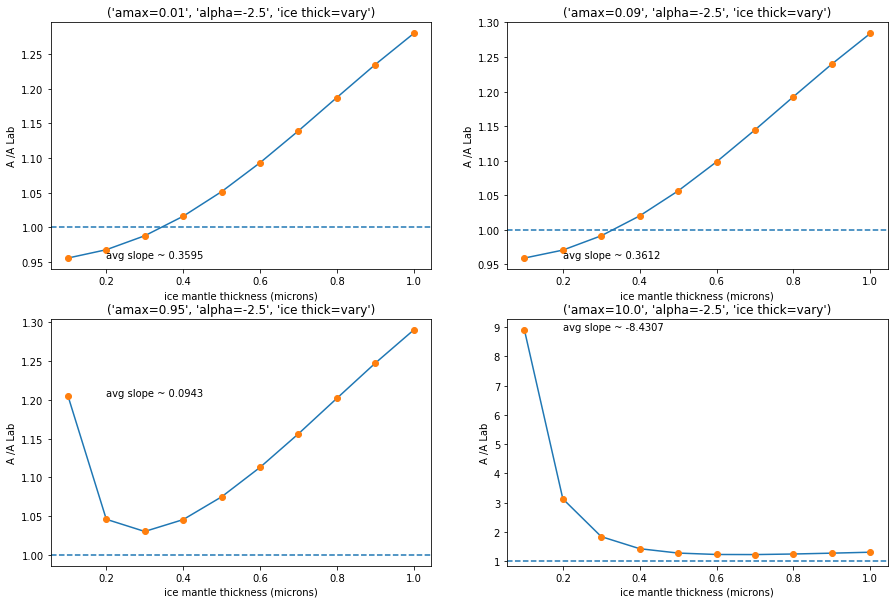

In [98]:
band_grid1([(0,0,"vary"),(9,0,"vary"),(19,0,"vary"),(29,0,"vary")])